# <center>**GOOGLE PLAY STORE APPS RATING PREDICTION**</center>


In this project, we aim to leverage machine learning techniques to predict the ratings of mobile applications available on the Google Play Store. The project merges two distinct datasets, combining information from the Google Play Store Apps dataset and the Google stock market dataset. By merging these datasets, we seek to explore potential relationships between the performance of apps on the Play Store and Google's stock market data.

We use the datasets:

1) Google Play Store Apps Dataset:
This dataset contains detailed information about various mobile applications available on the Google Play Store. It includes data such as  App Name, Category, Rating, Installs, Price and other relevant features that characterize the apps.
2) Google Stock Market Dataset:
The stock market dataset provides historical data on Google's stock performance, capturing metrics like opening and closing prices, trading volumes, and other financial indicators over time.

<p><div style="text-align: justify;">Merging datasets: The primary focus of the project is to merge these two datasets effectively, creating a unified dataset that combines information about app characteristics from the Google Play Store with Google's stock market performance data.
Explore Correlations: With the merged dataset, we aim to explore potential correlations or patterns between the ratings of Google Play Store apps and Google's stock market indicators. This investigation may help identify any underlying relationships or dependencies between the success of mobile applications and the financial performance of the parent company.
Rating Prediction Model: Develop a machine learning model to predict app ratings based on selected features from both datasets. This predictive model can be used to estimate the potential success of an app on the Play Store given certain characteristics and market conditions.</p></div>

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


### Load datasets

In [2]:
#loading google playstore_data and google stock market data
playstore_data = pd.read_csv('Google-Playstore.csv')
stock_data = pd.read_csv('GOOGL.csv')

In [3]:
# print shape of each dataset
print('Shape of playstore_data:',playstore_data.shape)
print('Shape of stock_data:',stock_data.shape)

Shape of playstore_data: (2312944, 24)
Shape of stock_data: (4041, 7)


# playstore_data

In [4]:
#let's explore playstore dataset
playstore_data.head()

App Name  \
0                                            Gakondo   
1                                Ampere Battery Info   
2                                             Vibook   
3  Smart City Trichy Public Service Vehicles 17UC...   
4                                            GROW.me   

                       App Id       Category  Rating  Rating Count Installs  \
0         com.ishakwe.gakondo      Adventure     0.0           0.0      10+   
1  com.webserveis.batteryinfo          Tools     4.4          64.0   5,000+   
2        com.doantiepvien.crm   Productivity     0.0           0.0      50+   
3     cst.stJoseph.ug17ucs548  Communication     5.0           5.0      10+   
4        com.horodyski.grower          Tools     0.0           0.0     100+   

   Minimum Installs  Maximum Installs  Free  Price  ...  \
0              10.0                15  True    0.0  ...   
1            5000.0              7662  True    0.0  ...   
2              50.0                58  True    0.0  ...   
3              10.0                19  True    0.0  ...   
4             100.0               478  True    0.0  ...   

                  Developer Website              Developer Email  \
0       https://beniyizibyose.tk/#/       jean21101999@gmail.com   
1   https://webserveis.netlify.app/         webserveis@gmail.com   
2                               NaN          vnacrewit@gmail.com   
3  http://www.climatesmarttech.com/  climatesmarttech2@gmail.com   
4       http://www.horodyski.com.pl    rmilekhorodyski@gmail.com   

       Released  Last Updated Content Rating  \
0  Feb 26, 2020  Feb 26, 2020       Everyone   
1  May 21, 2020  May 06, 2021       Everyone   
2   Aug 9, 2019  Aug 19, 2019       Everyone   
3  Sep 10, 2018  Oct 13, 2018       Everyone   
4  Feb 21, 2020  Nov 12, 2018       Everyone   

                                      Privacy Policy Ad Supported  \
0                 https://beniyizibyose.tk/projects/        False   
1  https://dev4phones.wordpress.com/licencia-de-uso/         True   
2  https://www.vietnamairlines.com/vn/en/terms-an...        False   
3                                                NaN         True   
4                        http://www.horodyski.com.pl        False   

  In App Purchases Editors Choice         Scraped Time  
0            False          False  2021-06-15 20:19:35  
1            False          False  2021-06-15 20:19:35  
2            False          False  2021-06-15 20:19:35  
3            False          False  2021-06-15 20:19:35  
4            False          False  2021-06-15 20:19:35  

[5 rows x 24 columns]

In [5]:
#checking for duplicate values
playstore_data.duplicated().sum()

0

In [6]:
#checking number of unique values 
playstore_data['App Id'].nunique()

2312944

In [7]:
playstore_data.describe()

Rating  Rating Count  Minimum Installs  Maximum Installs  \
count  2.290061e+06  2.290061e+06      2.312837e+06      2.312944e+06   
mean   2.203152e+00  2.864839e+03      1.834452e+05      3.202017e+05   
std    2.106223e+00  2.121626e+05      1.513144e+07      2.355495e+07   
min    0.000000e+00  0.000000e+00      0.000000e+00      0.000000e+00   
25%    0.000000e+00  0.000000e+00      5.000000e+01      8.400000e+01   
50%    2.900000e+00  6.000000e+00      5.000000e+02      6.950000e+02   
75%    4.300000e+00  4.200000e+01      5.000000e+03      7.354000e+03   
max    5.000000e+00  1.385576e+08      1.000000e+10      1.205763e+10   

              Price  
count  2.312944e+06  
mean   1.034992e-01  
std    2.633127e+00  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    4.000000e+02

In [8]:
#column names in the dataset
playstore_data.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

In [9]:
#dropping unwanted columns
playstore_data = playstore_data.drop(['App Id','Developer Website','Developer Email','Privacy Policy','Currency','Developer Id','Scraped Time','Minimum Android'],axis=1)



In [10]:
playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 16 columns):
 #   Column            Dtype  
---  ------            -----  
 0   App Name          object 
 1   Category          object 
 2   Rating            float64
 3   Rating Count      float64
 4   Installs          object 
 5   Minimum Installs  float64
 6   Maximum Installs  int64  
 7   Free              bool   
 8   Price             float64
 9   Size              object 
 10  Released          object 
 11  Last Updated      object 
 12  Content Rating    object 
 13  Ad Supported      bool   
 14  In App Purchases  bool   
 15  Editors Choice    bool   
dtypes: bool(4), float64(4), int64(1), object(7)
memory usage: 220.6+ MB


In [11]:
#checking null values
playstore_data.isna().sum()

App Name                5
Category                0
Rating              22883
Rating Count        22883
Installs              107
Minimum Installs      107
Maximum Installs        0
Free                    0
Price                   0
Size                  196
Released            71053
Last Updated            0
Content Rating          0
Ad Supported            0
In App Purchases        0
Editors Choice          0
dtype: int64

In [12]:
#calculating percentage of null values in each column
missing_percentage = playstore_data.isnull().sum().sort_values(ascending = False)/len(playstore_data) *100
missing_percentage

Released            3.071972
Rating              0.989345
Rating Count        0.989345
Size                0.008474
Installs            0.004626
Minimum Installs    0.004626
App Name            0.000216
Category            0.000000
Maximum Installs    0.000000
Free                0.000000
Price               0.000000
Last Updated        0.000000
Content Rating      0.000000
Ad Supported        0.000000
In App Purchases    0.000000
Editors Choice      0.000000
dtype: float64

Text(0.5, 1.0, 'Missig percentage of null values')

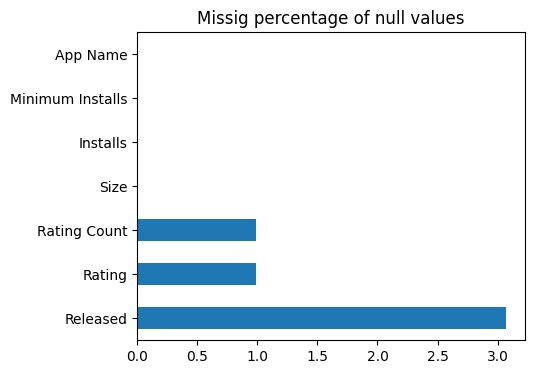

In [13]:
#Let's plot the missing percentage of null values
missing_percentage = missing_percentage[missing_percentage != 0] # Only the missing data
plt.figure(figsize=(5,4))
missing_percentage.plot(kind='barh')
plt.title("Missig percentage of null values")

In [14]:
#droping the null values of the selected columns 
playstore_data.dropna(subset = ['App Name','Minimum Installs','Installs','Size',], inplace = True)

Let's check each column and clean. Rating Count, Rating, Released are important column so it is good to fill the null values.

### Clean Rating and Rating Count columns

In [15]:
#checking Rating column unique values
playstore_data['Rating'].unique()

array([0. , 4.4, 5. , 4.5, 2. , 4.7, 4.9, 3.9, 3.7, 4.2, 3.4, 3.8, 4.6,
       4.1, 2.5, 2.3, 2.1, 2.7, 4.3, 3.1, 4.8, 3.3, 4. , 2.4, 3.2, 3.6,
       2.6, nan, 1.5, 3.5, 2.9, 1.3, 2.8, 3. , 2.2, 1.8, 1.4, 1.2, 1.9,
       1.7, 1.6, 1. , 1.1])

In [16]:
#fill nan val by avg 
playstore_data['Rating'] = playstore_data['Rating'].astype(float)
avg = round(playstore_data['Rating'].mean(),1)
playstore_data['Rating'].fillna(avg,inplace=True) 

In [17]:
#checking Rating Count column unique values
playstore_data['Rating Count'].unique()

array([0.0000e+00, 6.4000e+01, 5.0000e+00, ..., 8.7553e+04, 7.5960e+04,
       7.8351e+04])

In [18]:
# fill nan val by avg 
playstore_data['Rating Count'] = playstore_data['Rating'].astype(float)
avg = round(playstore_data['Rating Count'].mean(),1)
playstore_data['Rating Count'].fillna(avg,inplace=True) 

In [19]:
# Drop rows where Released date is null
playstore_data.dropna(subset=['Released'], inplace=True)

In [20]:
#checking dataset for more null values after 
playstore_data.isna().sum()

App Name            0
Category            0
Rating              0
Rating Count        0
Installs            0
Minimum Installs    0
Maximum Installs    0
Free                0
Price               0
Size                0
Released            0
Last Updated        0
Content Rating      0
Ad Supported        0
In App Purchases    0
Editors Choice      0
dtype: int64

In [21]:
playstore_data.head()

App Name       Category  Rating  \
0                                            Gakondo      Adventure     0.0   
1                                Ampere Battery Info          Tools     4.4   
2                                             Vibook   Productivity     0.0   
3  Smart City Trichy Public Service Vehicles 17UC...  Communication     5.0   
4                                            GROW.me          Tools     0.0   

   Rating Count Installs  Minimum Installs  Maximum Installs  Free  Price  \
0           0.0      10+              10.0                15  True    0.0   
1           4.4   5,000+            5000.0              7662  True    0.0   
2           0.0      50+              50.0                58  True    0.0   
3           5.0      10+              10.0                19  True    0.0   
4           0.0     100+             100.0               478  True    0.0   

   Size      Released  Last Updated Content Rating  Ad Supported  \
0   10M  Feb 26, 2020  Feb 26, 2020       Everyone         False   
1  2.9M  May 21, 2020  May 06, 2021       Everyone          True   
2  3.7M   Aug 9, 2019  Aug 19, 2019       Everyone         False   
3  1.8M  Sep 10, 2018  Oct 13, 2018       Everyone          True   
4  6.2M  Feb 21, 2020  Nov 12, 2018       Everyone         False   

   In App Purchases  Editors Choice  
0             False           False  
1             False           False  
2             False           False  
3             False           False  
4             False           False

### Clean installs

In [22]:
playstore_data['Installs'].unique()

array(['10+', '5,000+', '50+', '100+', '1,000+', '500+', '50,000+',
       '10,000+', '1+', '500,000+', '100,000+', '5+', '10,000,000+',
       '1,000,000+', '5,000,000+', '0+', '100,000,000+', '50,000,000+',
       '1,000,000,000+', '500,000,000+', '5,000,000,000+',
       '10,000,000,000+'], dtype=object)

In [23]:
#reomove the + symbol
#replace the commas ',' Free in the install column
#It is in the object type, we need to change it into the int type

In [24]:
playstore_data = playstore_data[playstore_data.Installs.str.contains('\+')]
playstore_data.Installs = playstore_data.Installs.str.replace('+','')
playstore_data.Installs = playstore_data.Installs.str.replace(',','')
playstore_data.Installs = playstore_data.Installs.str.replace('Free','0') # covert the free type to num (0)
playstore_data['Installs'] = pd.to_numeric(playstore_data['Installs'])  # converting it to the int type

In [25]:
playstore_data.dtypes['Installs']

dtype('int64')

### Cleaning Size column

In [26]:
playstore_data['Size'].unique()

array(['10M', '2.9M', '3.7M', ..., '405M', '3.2k', '512M'], dtype=object)

In [27]:
#checking the count of each value
value_counts = playstore_data['Size'].value_counts()
print(value_counts)

Size
11M                   60913
12M                   54932
Varies with device    51247
13M                   47018
14M                   44305
                      ...  
7.6k                      1
868M                      1
578M                      1
351M                      1
512M                      1
Name: count, Length: 1650, dtype: int64


In [28]:
# The Size of data can be in GB, MB and KB let's convert the data into the size in MB
#Also convert the data type of size from object to float

In [29]:
playstore_data['Size'] = playstore_data['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)

# repalce the ',' with the dot '.'
playstore_data['Size'] = playstore_data['Size'].apply(lambda x: str(x).replace(',', '.') if ',' in str(x) else x)

# conversion of kbs to mb
playstore_data['Size'] = playstore_data['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)

#conversion of gbs to mb
playstore_data['Size'] = playstore_data['Size'].apply(lambda x: float(str(x).replace('G', '')) * 1000 if 'G' in str(x) else x)

# we get an another missmatch value in the data set which is 'Varies with device' it means the size of the App may varies with the device, but here we can assuming it as 0
playstore_data['Size'] = playstore_data['Size'].apply(lambda x: str(x).replace('Varies with device', '0') if 'Varies with device' in str(x) else x)


In [30]:
playstore_data['Size'].unique()

array(['10', '2.9', '3.7', ..., '405', 0.0032, '512'], dtype=object)

In [31]:
value_counts = playstore_data['Size'].value_counts()
print(value_counts)

Size
11                      60913
12                      54932
0                       51247
13                      47018
14                      44305
                        ...  
765                         1
0.006900000000000001        1
497                         1
664                         1
512                         1
Name: count, Length: 1649, dtype: int64


In [32]:
#convert to float dtype
playstore_data['Size'] = playstore_data['Size'].apply(lambda x: float(x))
playstore_data.dtypes['Size']

dtype('float64')

In [33]:
playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2241879 entries, 0 to 2312943
Data columns (total 16 columns):
 #   Column            Dtype  
---  ------            -----  
 0   App Name          object 
 1   Category          object 
 2   Rating            float64
 3   Rating Count      float64
 4   Installs          int64  
 5   Minimum Installs  float64
 6   Maximum Installs  int64  
 7   Free              bool   
 8   Price             float64
 9   Size              float64
 10  Released          object 
 11  Last Updated      object 
 12  Content Rating    object 
 13  Ad Supported      bool   
 14  In App Purchases  bool   
 15  Editors Choice    bool   
dtypes: bool(4), float64(5), int64(2), object(5)
memory usage: 230.9+ MB


### Cleaning Rleased & Last updated dates

In [34]:
#convert Released and Last updated columns from object dtype to datetime64
playstore_data['Released'] = pd.to_datetime(playstore_data['Released'], format='%b %d, %Y')
playstore_data['Last Updated'] = pd.to_datetime(playstore_data['Last Updated'], format='%b %d, %Y')
playstore_data.dtypes

App Name                    object
Category                    object
Rating                     float64
Rating Count               float64
Installs                     int64
Minimum Installs           float64
Maximum Installs             int64
Free                          bool
Price                      float64
Size                       float64
Released            datetime64[ns]
Last Updated        datetime64[ns]
Content Rating              object
Ad Supported                  bool
In App Purchases              bool
Editors Choice                bool
dtype: object

### Cleaning column Free

In [35]:
playstore_data['Free'].value_counts()

Free
True     2197656
False      44223
Name: count, dtype: int64

In [36]:
# Creating the column type for free and paid Apps by using the Free column, it's helpfull while dealing with the paid and Free Apps
playstore_data['Type'] = np.where(playstore_data['Free'] == True,'Free','Paid')
playstore_data.drop(['Free'],axis=1, inplace= True )

In [37]:
playstore_data.head()

App Name       Category  Rating  \
0                                            Gakondo      Adventure     0.0   
1                                Ampere Battery Info          Tools     4.4   
2                                             Vibook   Productivity     0.0   
3  Smart City Trichy Public Service Vehicles 17UC...  Communication     5.0   
4                                            GROW.me          Tools     0.0   

   Rating Count  Installs  Minimum Installs  Maximum Installs  Price  Size  \
0           0.0        10              10.0                15    0.0  10.0   
1           4.4      5000            5000.0              7662    0.0   2.9   
2           0.0        50              50.0                58    0.0   3.7   
3           5.0        10              10.0                19    0.0   1.8   
4           0.0       100             100.0               478    0.0   6.2   

    Released Last Updated Content Rating  Ad Supported  In App Purchases  \
0 2020-02-26   2020-02-26       Everyone         False             False   
1 2020-05-21   2021-05-06       Everyone          True             False   
2 2019-08-09   2019-08-19       Everyone         False             False   
3 2018-09-10   2018-10-13       Everyone          True             False   
4 2020-02-21   2018-11-12       Everyone         False             False   

   Editors Choice  Type  
0           False  Free  
1           False  Free  
2           False  Free  
3           False  Free  
4           False  Free

In [38]:
playstore_data['Type'].unique()


array(['Free', 'Paid'], dtype=object)

In [39]:
playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2241879 entries, 0 to 2312943
Data columns (total 16 columns):
 #   Column            Dtype         
---  ------            -----         
 0   App Name          object        
 1   Category          object        
 2   Rating            float64       
 3   Rating Count      float64       
 4   Installs          int64         
 5   Minimum Installs  float64       
 6   Maximum Installs  int64         
 7   Price             float64       
 8   Size              float64       
 9   Released          datetime64[ns]
 10  Last Updated      datetime64[ns]
 11  Content Rating    object        
 12  Ad Supported      bool          
 13  In App Purchases  bool          
 14  Editors Choice    bool          
 15  Type              object        
dtypes: bool(3), datetime64[ns](2), float64(5), int64(2), object(4)
memory usage: 245.9+ MB


### Cleaning Content Rating

In [40]:
playstore_data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Mature 17+', 'Everyone 10+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [41]:
playstore_data['Content Rating'].value_counts()

Content Rating
Everyone           1959917
Teen                190173
Mature 17+           58677
Everyone 10+         32830
Unrated                152
Adults only 18+        130
Name: count, dtype: int64

In [42]:
#let's organize the rating given by different ages groups
playstore_data['Content Rating'] = playstore_data['Content Rating'].replace('Unrated',"Everyone")

#Cleaning other values just to include Everyone, Teens and Adult 
playstore_data['Content Rating'] = playstore_data['Content Rating'].replace('Mature 17+',"Adults")
playstore_data['Content Rating'] = playstore_data['Content Rating'].replace('Adults only 18+',"Adults")
playstore_data['Content Rating'] = playstore_data['Content Rating'].replace('Everyone 10+',"Everyone")

In [43]:
playstore_data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Adults'], dtype=object)

### Checking Category, Ad supported, In App Purchases and Editors Choice columns

In [44]:
playstore_data['Category'].unique()

array(['Adventure', 'Tools', 'Productivity', 'Communication', 'Social',
       'Libraries & Demo', 'Lifestyle', 'Personalization', 'Racing',
       'Maps & Navigation', 'Travel & Local', 'Food & Drink',
       'Books & Reference', 'Medical', 'Puzzle', 'Entertainment',
       'Arcade', 'Auto & Vehicles', 'Photography', 'Health & Fitness',
       'Education', 'Shopping', 'Board', 'Music & Audio', 'Sports',
       'Beauty', 'Business', 'Educational', 'Finance', 'News & Magazines',
       'Casual', 'Art & Design', 'House & Home', 'Card', 'Events',
       'Trivia', 'Weather', 'Strategy', 'Word', 'Video Players & Editors',
       'Action', 'Simulation', 'Music', 'Dating', 'Role Playing',
       'Casino', 'Comics', 'Parenting'], dtype=object)

In [45]:
playstore_data['Category'].value_counts()

Category
Education                  236116
Music & Audio              153452
Tools                      138334
Business                   136550
Entertainment              135484
Books & Reference          115537
Lifestyle                  115340
Personalization             88860
Health & Fitness            80723
Productivity                75275
Shopping                    71573
Food & Drink                71023
Travel & Local              64882
Finance                     62125
Arcade                      52489
Puzzle                      49915
Casual                      48873
Communication               46145
Sports                      45814
Social                      43132
News & Magazines            41873
Photography                 35163
Medical                     30125
Action                      26626
Maps & Navigation           25052
Adventure                   22540
Simulation                  22476
Educational                 20736
Art & Design                18310
Auto 

In [46]:
playstore_data['Ad Supported'].value_counts()

Ad Supported
True     1135294
False    1106585
Name: count, dtype: int64

In [47]:
#let's change the In App Purchases values from boolean to Yes and No
playstore_data["Ad Supported"] = playstore_data["Ad Supported"].replace({True: 'Yes', False: 'No'})


In [48]:
playstore_data['Ad Supported'].unique()

array(['No', 'Yes'], dtype=object)

In [49]:
playstore_data['In App Purchases'].value_counts()

In App Purchases
False    2050280
True      191599
Name: count, dtype: int64

In [50]:
#let's change the In App Purchases values from boolean to Yes and No
playstore_data["In App Purchases"] = playstore_data["In App Purchases"].replace({True: 'Yes', False: 'No'})


In [51]:
playstore_data['In App Purchases'].unique()

array(['No', 'Yes'], dtype=object)

In [52]:
playstore_data['Editors Choice'].value_counts()

Editors Choice
False    2241094
True         785
Name: count, dtype: int64

In [53]:
#let's change the editor's choice values from boolean to Yes and No, because it helps to say whether an app has received the "Editor's Choice" designation
playstore_data["Editors Choice"] = playstore_data["Editors Choice"].replace({True: 'Yes', False: 'No'})



In [54]:
playstore_data['Editors Choice'].unique()

array(['No', 'Yes'], dtype=object)

In [55]:
playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2241879 entries, 0 to 2312943
Data columns (total 16 columns):
 #   Column            Dtype         
---  ------            -----         
 0   App Name          object        
 1   Category          object        
 2   Rating            float64       
 3   Rating Count      float64       
 4   Installs          int64         
 5   Minimum Installs  float64       
 6   Maximum Installs  int64         
 7   Price             float64       
 8   Size              float64       
 9   Released          datetime64[ns]
 10  Last Updated      datetime64[ns]
 11  Content Rating    object        
 12  Ad Supported      object        
 13  In App Purchases  object        
 14  Editors Choice    object        
 15  Type              object        
dtypes: datetime64[ns](2), float64(5), int64(2), object(7)
memory usage: 290.8+ MB


In [56]:
#leaned playstore data with required features, ready to merge with stock_data
playstore_data.head()

App Name       Category  Rating  \
0                                            Gakondo      Adventure     0.0   
1                                Ampere Battery Info          Tools     4.4   
2                                             Vibook   Productivity     0.0   
3  Smart City Trichy Public Service Vehicles 17UC...  Communication     5.0   
4                                            GROW.me          Tools     0.0   

   Rating Count  Installs  Minimum Installs  Maximum Installs  Price  Size  \
0           0.0        10              10.0                15    0.0  10.0   
1           4.4      5000            5000.0              7662    0.0   2.9   
2           0.0        50              50.0                58    0.0   3.7   
3           5.0        10              10.0                19    0.0   1.8   
4           0.0       100             100.0               478    0.0   6.2   

    Released Last Updated Content Rating Ad Supported In App Purchases  \
0 2020-02-26   2020-02-26       Everyone           No               No   
1 2020-05-21   2021-05-06       Everyone          Yes               No   
2 2019-08-09   2019-08-19       Everyone           No               No   
3 2018-09-10   2018-10-13       Everyone          Yes               No   
4 2020-02-21   2018-11-12       Everyone           No               No   

  Editors Choice  Type  
0             No  Free  
1             No  Free  
2             No  Free  
3             No  Free  
4             No  Free

In [57]:
playstore_data.shape

(2241879, 16)

# stock_data

In [58]:
#now, let's explore google stock market dataset
stock_data.head()

Date       Open       High        Low      Close  Adj Close    Volume
0  2004-08-19  50.050049  52.082081  48.028027  50.220219  50.220219  44659000
1  2004-08-20  50.555557  54.594593  50.300301  54.209209  54.209209  22834300
2  2004-08-23  55.430431  56.796795  54.579578  54.754753  54.754753  18256100
3  2004-08-24  55.675674  55.855854  51.836838  52.487488  52.487488  15247300
4  2004-08-25  52.532532  54.054054  51.991993  53.053055  53.053055   9188600

In [59]:
stock_data.duplicated().sum()

0

In [60]:
stock_data.describe()

Open         High          Low        Close    Adj Close  \
count  4041.000000  4041.000000  4041.000000  4041.000000  4041.000000   
mean    533.983149   538.995819   528.658860   533.999060   533.999060   
std     383.007917   386.590237   379.488087   383.326004   383.326004   
min      49.644646    50.920921    48.028027    50.055054    50.055054   
25%     241.211212   243.688690   238.873871   241.036041   241.036041   
50%     342.592590   345.795807   338.598602   342.177185   342.177185   
75%     791.979980   798.000000   786.200012   790.460022   790.460022   
max    1699.520020  1726.099976  1660.189941  1717.390015  1717.390015   

             Volume  
count  4.041000e+03  
mean   6.909802e+06  
std    7.895987e+06  
min    5.206000e+05  
25%    1.844600e+06  
50%    4.191600e+06  
75%    8.702600e+06  
max    8.215110e+07

In [61]:
stock_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [62]:
#drop unwanted column
stock_data=stock_data.drop(['Adj Close'], axis=1)

In [63]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4041 entries, 0 to 4040
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4041 non-null   object 
 1   Open    4041 non-null   float64
 2   High    4041 non-null   float64
 3   Low     4041 non-null   float64
 4   Close   4041 non-null   float64
 5   Volume  4041 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 189.6+ KB


In [64]:
#converting Date column to datetime
stock_data['Date'] = pd.to_datetime(stock_data['Date'], format='%Y-%m-%d')

In [65]:
stock_data.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [66]:
stock_data.shape

(4041, 6)

# Merging Datasets: playstore_data and stock_data

In [67]:
# Merge datasets on the date columns from both dataset. Released column from playstore dataset and Date column from stock dataset
play_stock_data = pd.merge(playstore_data, stock_data, how='inner', left_on='Released', right_on='Date')

In [68]:
play_stock_data.head()


App Name           Category  Rating  \
0                                Gakondo          Adventure     0.0   
1                   Monkey Jungle Escape             Arcade     0.0   
2                    Saint Jude Thaddeus  Books & Reference     4.3   
3      Audiobooks listen online: Booklis  Books & Reference     4.3   
4  Maps Redstone House - Modern Mansions      Entertainment     3.4   

   Rating Count  Installs  Minimum Installs  Maximum Installs  Price  Size  \
0           0.0        10              10.0                15    0.0  10.0   
1           0.0        10              10.0                35    0.0  21.0   
2           4.3      1000            1000.0              1105    0.0   4.4   
3           4.3    100000          100000.0            261691    0.0  38.0   
4           3.4     10000           10000.0             27173    0.0  43.0   

    Released  ... Ad Supported In App Purchases Editors Choice  Type  \
0 2020-02-26  ...           No               No             No  Free   
1 2020-02-26  ...           No               No             No  Free   
2 2020-02-26  ...           No               No             No  Free   
3 2020-02-26  ...          Yes              Yes             No  Free   
4 2020-02-26  ...          Yes               No             No  Free   

        Date        Open         High          Low        Close   Volume  
0 2020-02-26  1394.97998  1413.670044  1376.550049  1390.469971  2488800  
1 2020-02-26  1394.97998  1413.670044  1376.550049  1390.469971  2488800  
2 2020-02-26  1394.97998  1413.670044  1376.550049  1390.469971  2488800  
3 2020-02-26  1394.97998  1413.670044  1376.550049  1390.469971  2488800  
4 2020-02-26  1394.97998  1413.670044  1376.550049  1390.469971  2488800  

[5 rows x 22 columns]

In [69]:
play_stock_data.shape

(1483784, 22)

In [70]:
play_stock_data.columns

Index(['App Name', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Price', 'Size', 'Released',
       'Last Updated', 'Content Rating', 'Ad Supported', 'In App Purchases',
       'Editors Choice', 'Type', 'Date', 'Open', 'High', 'Low', 'Close',
       'Volume'],
      dtype='object')

In [71]:
play_stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1483784 entries, 0 to 1483783
Data columns (total 22 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   App Name          1483784 non-null  object        
 1   Category          1483784 non-null  object        
 2   Rating            1483784 non-null  float64       
 3   Rating Count      1483784 non-null  float64       
 4   Installs          1483784 non-null  int64         
 5   Minimum Installs  1483784 non-null  float64       
 6   Maximum Installs  1483784 non-null  int64         
 7   Price             1483784 non-null  float64       
 8   Size              1483784 non-null  float64       
 9   Released          1483784 non-null  datetime64[ns]
 10  Last Updated      1483784 non-null  datetime64[ns]
 11  Content Rating    1483784 non-null  object        
 12  Ad Supported      1483784 non-null  object        
 13  In App Purchases  1483784 non-null  object

# Feature Engineering & EDA

Feature engineering involves creating new features from existing ones to enhance the predictive power of our model. Let's consider some features that help us in predict app ratings using both the Google Play Store dataset and the Google Stock Market dataset.

### Adding Features

## 1. Time Gap Between App Release and Stock Market Data:

'Time_Gap,' representing the number of days between the app release and the corresponding stock market date. This information might be valuable, as market conditions at the time of release would influence app ratings.

In [72]:
# 'Released' is the release date of the app and 'Date' is the stock market date, calculate time gap between them
play_stock_data['Time Gap'] = (play_stock_data['Date'] - play_stock_data['Released']).dt.days
play_stock_data['Time Gap'].unique()

array([0])

It indicates that for the given rows in your DataFrame, the 'Released' date and 'Date' date are identical. As a result, the time gap between them is zero days.

In [73]:
# Display rows where the time gap is non-zero
non_zero_time_gaps = play_stock_data[play_stock_data['Time Gap'] != 0]
print("Rows with Non-Zero Time Gap:")
print(non_zero_time_gaps)


Rows with Non-Zero Time Gap:
Empty DataFrame
Columns: [App Name, Category, Rating, Rating Count, Installs, Minimum Installs, Maximum Installs, Price, Size, Released, Last Updated, Content Rating, Ad Supported, In App Purchases, Editors Choice, Type, Date, Open, High, Low, Close, Volume, Time Gap]
Index: []

[0 rows x 23 columns]


It suggests that, based on our current dataset, there are no instances where the app release date and the stock market date differ. In other words, for all the rows in our dataFrame, the app was released on the same day as the corresponding stock market date. Since, it do not have any meaningful insights, we can drop this column.

In [74]:
# Drop the 'Time_Gap' column from the DataFrame
play_stock_data = play_stock_data.drop(columns=['Time Gap'])


## 2. Interaction Features:

Creating interaction features involves combining information from different columns to capture potential dependencies. The resulting 'Interaction_Rating_Volume' feature reflects the interaction or joint influence of the number of ratings and the trading volume. This interaction feature might be useful if we suspect that the impact of ratings on the app's performance in the stock market is related to the trading volume.

In [75]:
# Interaction between 'Rating' and 'Volume'
play_stock_data['Interaction_Rating_Volume'] = play_stock_data['Rating'] * play_stock_data['Volume']


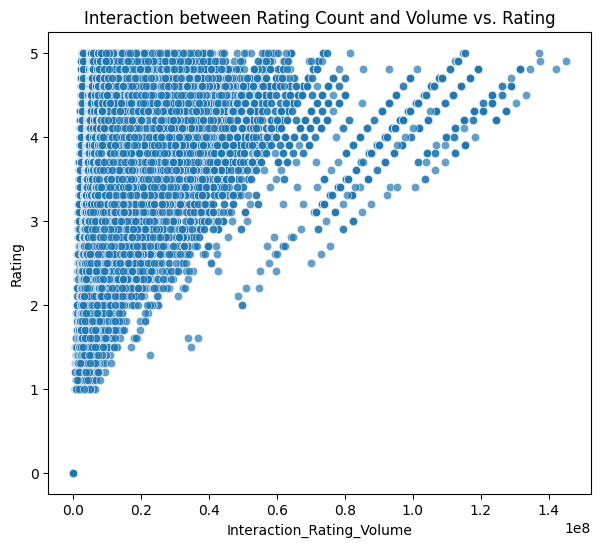

In [76]:


# Assuming 'Rating' is a numeric column
plt.figure(figsize=(7,6))
sns.scatterplot(x='Interaction_Rating_Volume', y='Rating', data=play_stock_data, alpha=0.7)
plt.title('Interaction between Rating Count and Volume vs. Rating')
plt.xlabel('Interaction_Rating_Volume')
plt.ylabel('Rating')
plt.show()


* The pattern in the scatter plot suggests a potential relationship between the interaction feature and the app ratings.
* Positive trend indicate that higher values of the interaction feature are associated with higher ratings, and vice versa.

## 3. Duration Since Last Update:

This feature captures the number of days since the last update of the app, which could potentially influence app ratings.

In [77]:
#duration since last update
play_stock_data['Duration_Since_Last_Update'] = (pd.to_datetime('now') - play_stock_data['Last Updated']).dt.days


In [78]:
play_stock_data['Duration_Since_Last_Update'].unique()

array([1442, 1191,  989, ..., 5109, 4840, 4990])

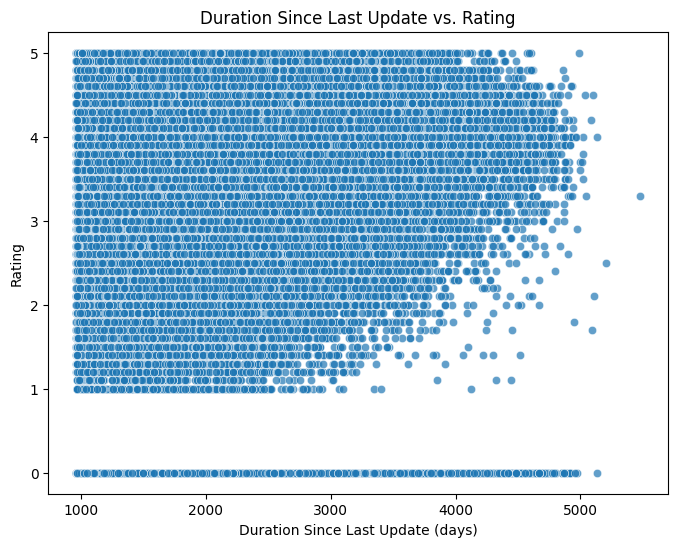

In [79]:
# Scatter plot: Duration since last update vs. Rating
plt.figure(figsize=(8,6))
sns.scatterplot(x='Duration_Since_Last_Update', y='Rating', data=play_stock_data, alpha=0.7)
plt.title('Duration Since Last Update vs. Rating')
plt.xlabel('Duration Since Last Update (days)')
plt.ylabel('Rating')
plt.show()

* The scatter plot visualizes the relationship between the duration since the last update and the app ratings.
* Each point on the plot represents an app, where the x-axis shows the number of days since the last update, and the y-axis represents the app's rating.
* Pattern in the plot can provide insights into whether there is any correlation between the recency of updates and the app ratings. Here we can say that if the updates are more frequent or if the duration is less then there is a chance for higher rating.

## 4. App Name Length & Install range:

The length of the app name might influence user perception and ratings. Also check  how the install range varies with the length of app names.

In [80]:
# Calculate the length of the app names
play_stock_data['App_Name_Length'] = play_stock_data['App Name'].str.len()


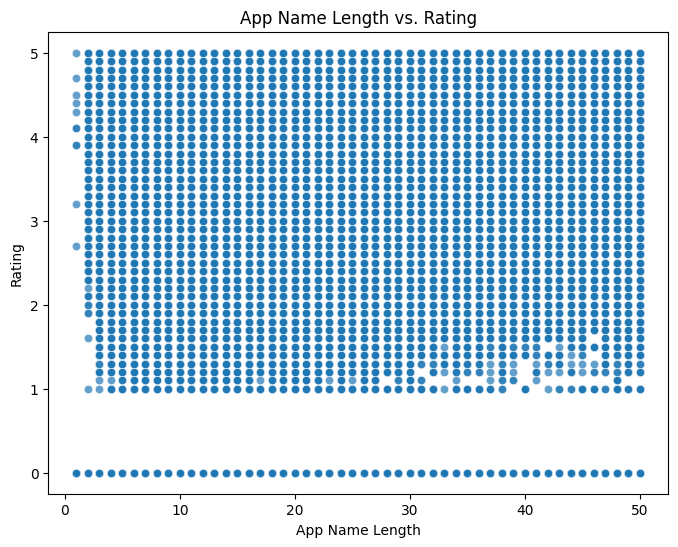

In [81]:

#Plot to check whether app name length and rating are related
plt.figure(figsize=(8,6))
sns.scatterplot(x='App_Name_Length', y='Rating', data=play_stock_data, alpha=0.7)
plt.title('App Name Length vs. Rating')
plt.xlabel('App Name Length')
plt.ylabel('Rating')
plt.show()


Checked whether rating have any relation with app name length, but no significant change observed , now let's checks installs, app name length and rating do have any connection.



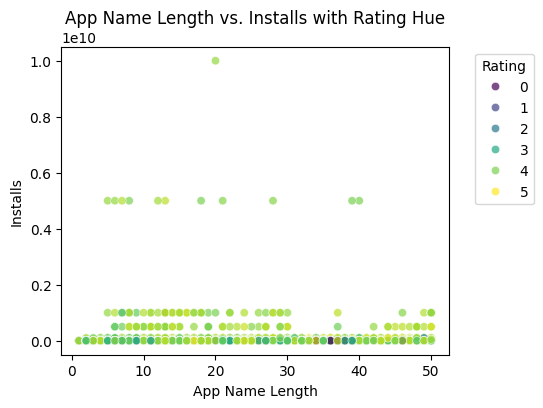

In [82]:
#plot to check whether app name length contribute to more installs  and rating 

plt.figure(figsize=(5,4))
sns.scatterplot(x='App_Name_Length', y='Installs', hue='Rating', data=play_stock_data, palette='viridis', alpha=0.7)
plt.title('App Name Length vs. Installs with Rating Hue')
plt.xlabel('App Name Length')
plt.ylabel('Installs')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


No significant effect, but a minor changes in installs and rating can be seen, we can say that if app length increases the count of installs reducing for some of them as well as the rating is observed to be higher for apps with short app name length. This can have a lighter influence in predicting ratings.

## Add Install Range

Install range feature represents the range of installs, providing additional information about the popularity of the app.

In [83]:
# Calculate the range between 'Minimum Installs' and 'Maximum Installs'
play_stock_data['Install_Range'] = play_stock_data['Maximum Installs'] - play_stock_data['Minimum Installs']


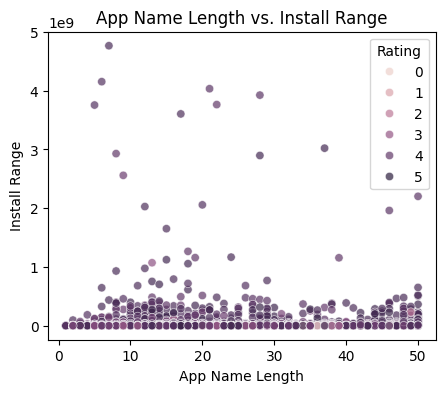

In [84]:

# Assuming 'Install_Range' is calculated as the difference between 'Maximum Installs' and 'Minimum Installs'
plt.figure(figsize=(5,4))
sns.scatterplot(x='App_Name_Length', y='Install_Range', hue = 'Rating', data=play_stock_data, alpha=0.7)
plt.title('App Name Length vs. Install Range')
plt.xlabel('App Name Length')
plt.ylabel('Install Range')
plt.show()


* Install range is almost same or a lighter effect for most of the apps with different app name lengths and a very few of them are with high install range and rating with short app name length.
* From this we can say that Install range and rating is higher for apps with short app name length.
* This would help us in predicting rating.

## 5. Ratio between Rating and average stock price

The 'Rating_to_Stock_Price_Ratio' reflects the relationship between the app's rating and the avg stock price. This ratio is calculated by dividing the app's rating by the avg stock price. It represents the relationship between the app rating and avg stock price. It indicates how the quality or satisfaction level of an app, as reflected in its rating, relates to its stock market performance. The ratio provides unique insights into how app popularity and user perception influence stock market dynamics. Calculate the average stock price for each app and then create a feature representing the ratio of app ratings to the average stock price.

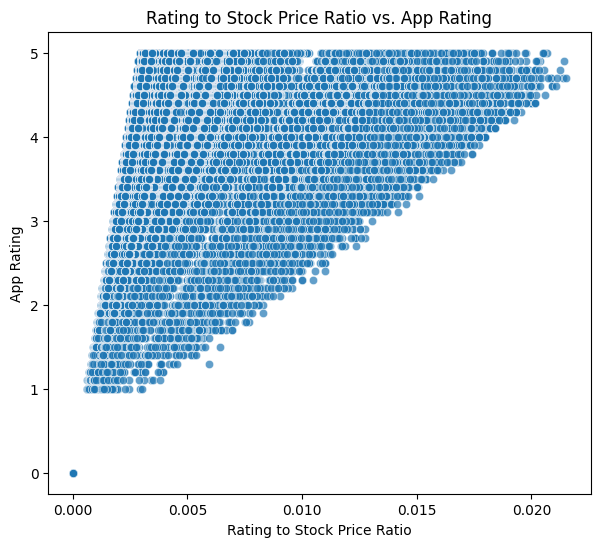

In [85]:
# Rating_to_Stock_Price_Ratio
# 'Close' is the stock closing price
# Calculate the average stock price for each app
mean_stock_price_by_app = play_stock_data.groupby('App Name')['Close'].mean().reset_index()
play_stock_data = play_stock_data.merge(mean_stock_price_by_app, on='App Name', suffixes=('', '_Mean'))

# Create a feature: Ratio of app ratings to the average stock price
play_stock_data['Rating_to_Stock_Price_Ratio'] = play_stock_data['Rating'] / play_stock_data['Close_Mean']

# plot: Ratio of app ratings to average stock price vs. App Rating
plt.figure(figsize=(7, 6))
sns.scatterplot(x='Rating_to_Stock_Price_Ratio', y='Rating', data=play_stock_data, alpha=0.7)
plt.title('Rating to Stock Price Ratio vs. App Rating')
plt.xlabel('Rating to Stock Price Ratio')
plt.ylabel('App Rating')
plt.show()


* A higher ratio may suggest that the app is relatively more popular compared to its stock market valuation, while a lower ratio may suggest the opposite.
* Changes in the 'Rating_to_Stock_Price_Ratio' over time can help identify trends in how app popularity correlates with stock market performance.
* Positive trends indicate that highly rated and popular apps are experiencing positive trends in stock prices, and vice versa.
* We can say that, the 'Rating_to_Stock_Price_Ratio' can serve as a relevant feature that combines information from both domains.
* The plot shows a positive correlation between the ratio and app rating, indicating that as the ratio increases (indicating higher app ratings relative to stock price), the app rating tends to increase as well.


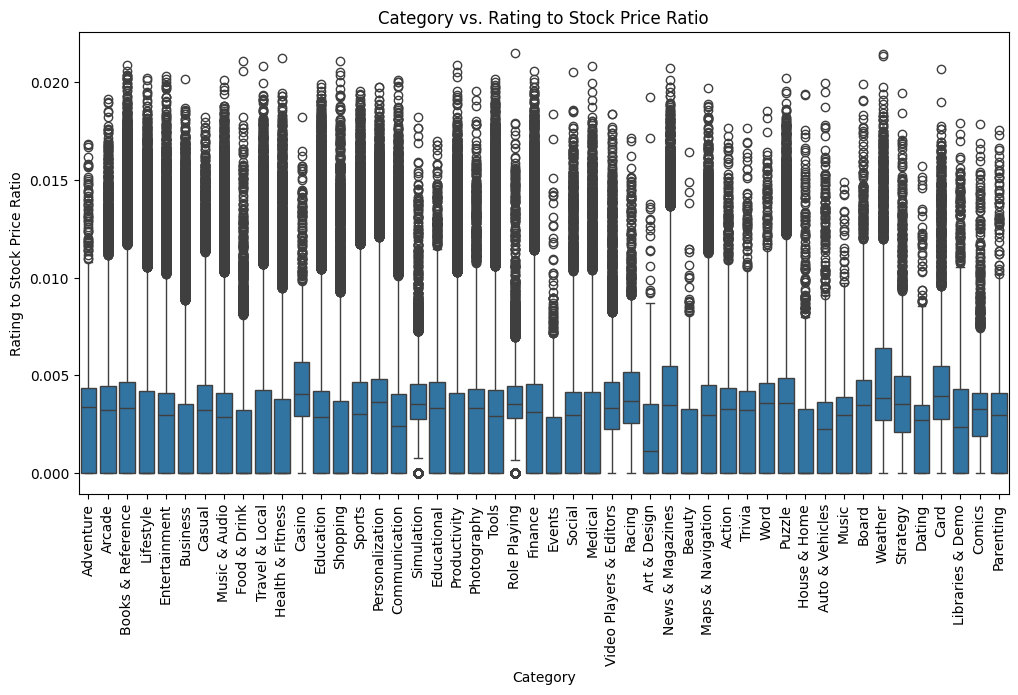

In [86]:
# plot: Category vs. Rating_to_Stock_Price_Ratio
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Rating_to_Stock_Price_Ratio', data=play_stock_data)
plt.xticks(rotation=90)
plt.title('Category vs. Rating to Stock Price Ratio')
plt.xlabel('Category')
plt.ylabel('Rating to Stock Price Ratio')
plt.show()

* Each box plot represents the distribution of the ratio within a specific category, allowing us to compare how the ratio varies across different categories.
* From the boxplot we can analyze that 'News & Magazines' category exhibits a wider range of the rating-to-stock price ratio compared to other categories, and that categories like 'Weather' and 'Casino' have relatively higher ratios.
* The wider range of the rating-to-stock price ratio in the 'News & Magazines' category indicates greater variability in how app ratings relate to stock prices within this category.
* This variability could be due to several factors such as the diversity of apps within the category, varying levels of user engagement, different monetization strategies, or fluctuations in market demand for news and magazine apps.
* The higher ratio observed in the 'Weather' category suggests that apps in this category may have relatively higher app ratings compared to their average stock prices. This could be because weather apps often provide essential or highly valued services to users, leading to higher user satisfaction and ratings despite potentially lower stock prices. Weather related events or phenomena may influence user engagement with these apps, contributing to their perceived value and ratings.
* The higher ratio observed in the 'Casino' category indicates that apps in this category may have higher app ratings relative to their average stock prices. Casino apps may attract a dedicated user base and generate significant revenue through in-app purchases or subscriptions, contributing to their higher ratings despite potentially lower stock prices.
Additionally, the entertainment value and social aspects of casino games may lead to higher user engagement and satisfaction, driving up app ratings.

These observations provide insights into how different app categories may vary in terms of the relationship between app ratings and stock prices. Factors such as app functionality, user engagement, market demand, and monetization strategies can influence this relationship and contribute to the observed patterns in the box plot analysis.

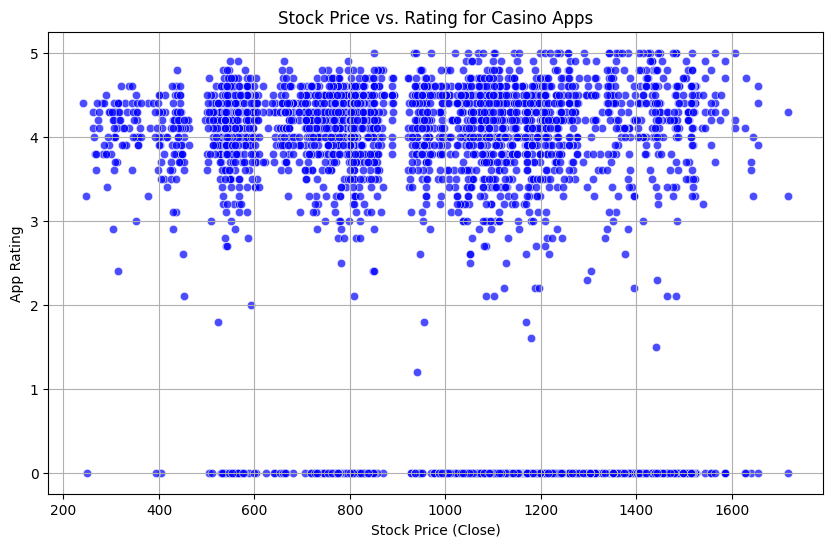

In [87]:
# Filter data for Casino apps
casino_apps = play_stock_data[play_stock_data['Category'] == 'Casino']

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Close', y='Rating', data=casino_apps, color='blue', alpha=0.7)
plt.title('Stock Price vs. Rating for Casino Apps')
plt.xlabel('Stock Price (Close)')
plt.ylabel('App Rating')
plt.grid(True)
plt.show()

* This scatter plot will show the relationship between the stock price and app rating specifically for Casino apps.
* It seems that Casino apps tend to receive higher ratings when the stock price falls within the range of 400 to 1200. Below and above this range, the ratings are comparatively lower.
* Users may perceive Casino apps as more valuable or trustworthy when the associated stock prices are within a certain range. This could be due to factors such as perceived stability, brand reputation, or financial performance.
* Casino apps priced within this range might offer better user experiences, higher quality gameplay, or more engaging features, leading to higher user satisfaction and consequently, higher ratings.
*  This observation suggests a potential correlation between stock prices and app ratings within the Casino app category.

### Top 10 Popular Apps in the Casino Category

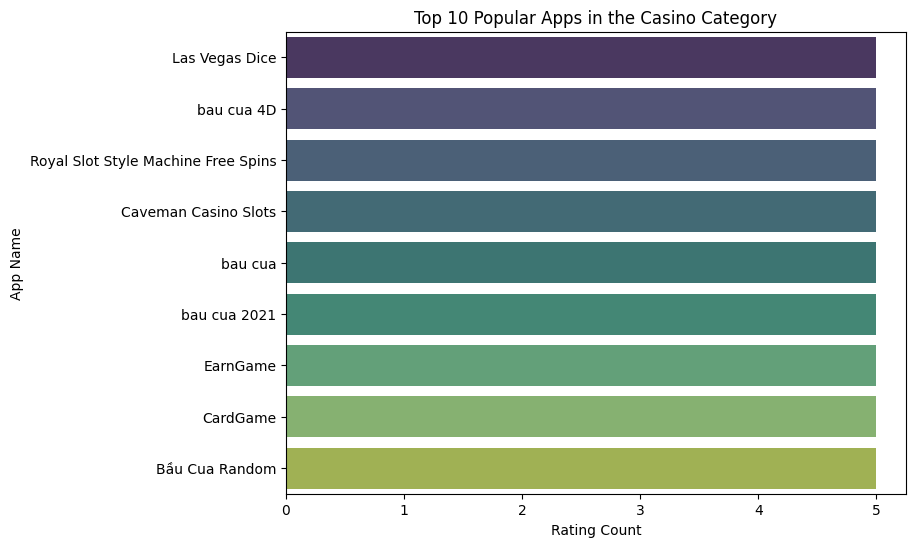

In [88]:
#'Category' column contains the app categories and 'Rating Count' contains the number of ratings
df_social = play_stock_data[play_stock_data['Category'] == 'Casino'].sort_values(by='Rating Count', ascending=False).head(10)

plt.figure(figsize=(8, 6))
sns.barplot(x='Rating Count', y='App Name', data=df_social, palette='viridis', saturation=0.5)
plt.title('Top 10 Popular Apps in the Casino Category')
plt.xlabel('Rating Count')
plt.ylabel('App Name')
plt.show()

### Popular Apps in News & Magazines

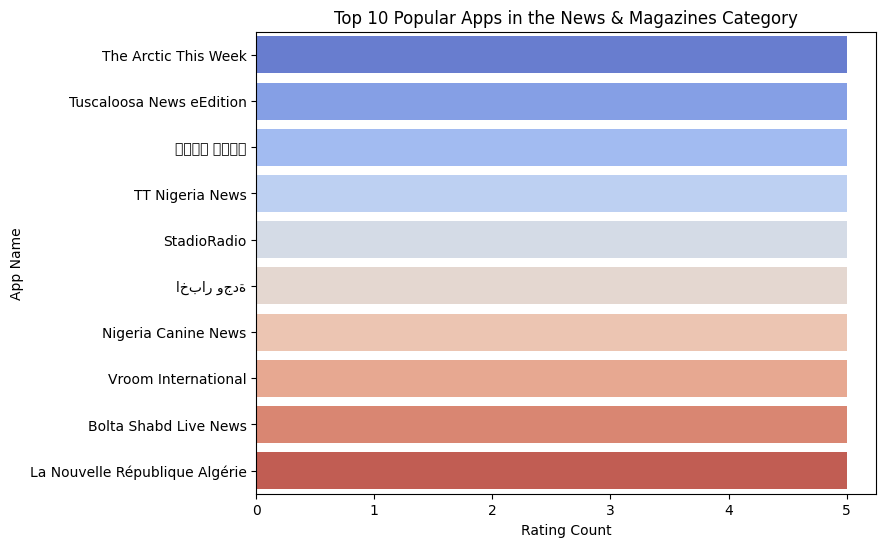

In [89]:
#'Category' column contains the app categories and 'Rating Count' contains the number of ratings
df_social = play_stock_data[play_stock_data['Category'] == 'News & Magazines'].sort_values(by='Rating Count', ascending=False).head(10)

plt.figure(figsize=(8, 6))
sns.barplot(x='Rating Count', y='App Name', data=df_social, palette='coolwarm')
plt.title('Top 10 Popular Apps in the News & Magazines Category')
plt.xlabel('Rating Count')
plt.ylabel('App Name')
plt.show()

#### Popular Apps in the Weather Category

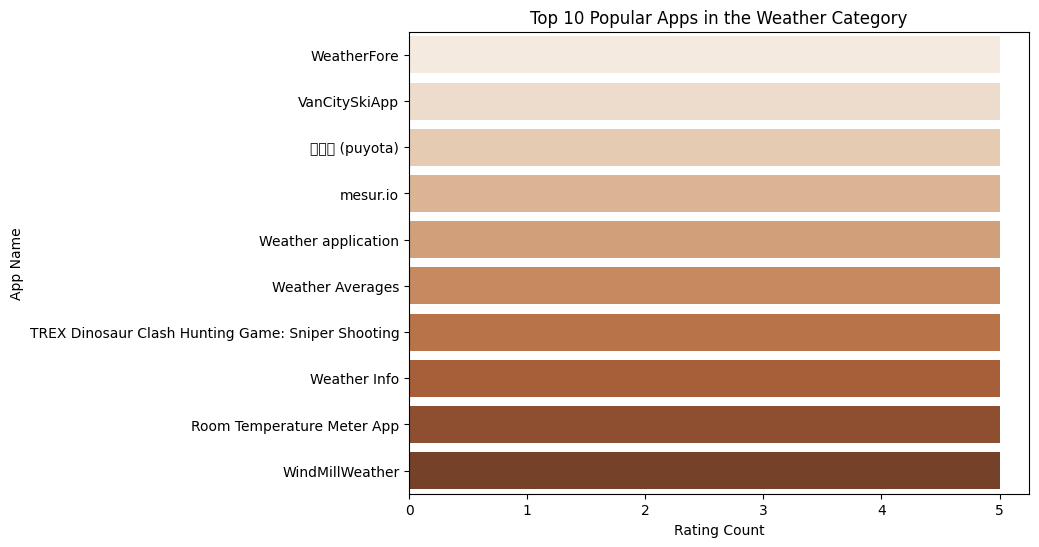

In [90]:
# Assuming 'Category' column contains the app categories and 'Rating Count' contains the number of ratings
df_social = play_stock_data[play_stock_data['Category'] == 'Weather'].sort_values(by='Rating Count', ascending=False).head(10)

plt.figure(figsize=(8, 6))
sns.barplot(x='Rating Count', y='App Name', data=df_social, palette='Oranges',saturation=0.5)
plt.title('Top 10 Popular Apps in the Weather Category')
plt.xlabel('Rating Count')
plt.ylabel('App Name')
plt.show()

#### Final Dataset after feature engineering

In [91]:
play_stock_data.head()

App Name           Category  Rating  Rating Count  Installs  \
0               Gakondo          Adventure     0.0           0.0        10   
1  Monkey Jungle Escape             Arcade     0.0           0.0        10   
2   Saint Jude Thaddeus  Books & Reference     4.3           4.3      1000   
3   Saint Jude Thaddeus          Lifestyle     0.0           0.0        50   
4   Saint Jude Thaddeus          Lifestyle     4.7           4.7      5000   

   Minimum Installs  Maximum Installs  Price  Size   Released  ...  \
0              10.0                15    0.0  10.0 2020-02-26  ...   
1              10.0                35    0.0  21.0 2020-02-26  ...   
2            1000.0              1105    0.0   4.4 2020-02-26  ...   
3              50.0                96    0.0   5.7 2020-04-16  ...   
4            5000.0              5160    0.0   3.2 2017-04-24  ...   

          High          Low        Close   Volume Interaction_Rating_Volume  \
0  1413.670044  1376.550049  1390.469971  2488800                       0.0   
1  1413.670044  1376.550049  1390.469971  2488800                       0.0   
2  1413.670044  1376.550049  1390.469971  2488800                10701840.0   
3  1273.359985  1238.199951  1257.430054  2894800                       0.0   
4   879.960022   866.109985   878.929993  1696500                 7973550.0   

  Duration_Since_Last_Update App_Name_Length  Install_Range   Close_Mean  \
0                       1442               7            5.0  1390.469971   
1                       1442              20           25.0  1390.469971   
2                       1191              19          105.0  1175.610006   
3                       1392              19           46.0  1175.610006   
4                       2480              19          160.0  1175.610006   

   Rating_to_Stock_Price_Ratio  
0                     0.000000  
1                     0.000000  
2                     0.003658  
3                     0.000000  
4                     0.003998  

[5 rows x 28 columns]

In [92]:
play_stock_data.shape

(1483784, 28)

In [93]:
play_stock_data.describe()

Rating  Rating Count      Installs  Minimum Installs  \
count  1.483784e+06  1.483784e+06  1.483784e+06      1.483784e+06   
mean   2.275692e+00  2.275692e+00  2.307686e+05      2.307686e+05   
min    0.000000e+00  0.000000e+00  0.000000e+00      0.000000e+00   
25%    0.000000e+00  0.000000e+00  1.000000e+02      1.000000e+02   
50%    3.200000e+00  3.200000e+00  5.000000e+02      5.000000e+02   
75%    4.300000e+00  4.300000e+00  5.000000e+03      5.000000e+03   
max    5.000000e+00  5.000000e+00  1.000000e+10      1.000000e+10   
std    2.091910e+00  2.091910e+00  1.731238e+07      1.731238e+07   

       Maximum Installs         Price          Size  \
count      1.483784e+06  1.483784e+06  1.483784e+06   
mean       4.018378e+05  1.163446e-01  1.816185e+01   
min        0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.120000e+02  0.000000e+00  4.500000e+00   
50%        8.780000e+02  0.000000e+00  9.600000e+00   
75%        9.110000e+03  0.000000e+00  2.400000e+01   
max        1.205763e+10  4.000000e+02  1.500000e+03   
std        2.668732e+07  2.698815e+00  2.296850e+01   

                            Released                   Last Updated  \
count                        1483784                        1483784   
mean   2018-03-23 03:26:32.402127616  2019-09-25 18:04:25.177141504   
min              2010-01-28 00:00:00            2009-02-09 00:00:00   
25%              2017-02-22 00:00:00            2019-01-14 00:00:00   
50%              2018-09-27 00:00:00            2020-02-13 00:00:00   
75%              2019-10-29 00:00:00            2020-11-11 00:00:00   
max              2020-09-04 00:00:00            2021-06-16 00:00:00   
std                              NaN                            NaN   

                                Date  ...          High           Low  \
count                        1483784  ...  1.483784e+06  1.483784e+06   
mean   2018-03-23 03:26:32.402127616  ...  1.065242e+03  1.044612e+03   
min              2010-01-28 00:00:00  ...  2.213614e+02  2.170320e+02   
25%              2017-02-22 00:00:00  ...  8.454000e+02  8.373000e+02   
50%              2018-09-27 00:00:00  ...  1.119150e+03  1.094500e+03   
75%              2019-10-29 00:00:00  ...  1.252890e+03  1.230380e+03   
max              2020-09-04 00:00:00  ...  1.726100e+03  1.660190e+03   
std                              NaN  ...  3.012211e+02  2.942752e+02   

              Close        Volume  Interaction_Rating_Volume  \
count  1.483784e+06  1.483784e+06               1.483784e+06   
mean   1.055501e+03  2.013614e+06               4.821392e+06   
min    2.182533e+02  5.206000e+05               0.000000e+00   
25%    8.417000e+02  1.321100e+06               0.000000e+00   
50%    1.106500e+03  1.658500e+06               4.245040e+06   
75%    1.242240e+03  2.267900e+06               7.423090e+06   
max    1.717390e+03  2.961990e+07               1.451375e+08   
std    2.981418e+02  1.246453e+06               6.135476e+06   

       Duration_Since_Last_Update  App_Name_Length  Install_Range  \
count                1.483784e+06     1.483784e+06   1.483784e+06   
mean                 1.595247e+03     2.136980e+01   1.710692e+05   
min                  9.660000e+02     1.000000e+00   0.000000e+00   
25%                  1.183000e+03     1.200000e+01   3.300000e+01   
50%                  1.455000e+03     1.900000e+01   2.960000e+02   
75%                  1.850000e+03     2.800000e+01   3.151000e+03   
max                  5.476000e+03     5.000000e+01   4.766231e+09   
std                  5.628981e+02     1.160907e+01   1.156506e+07   

         Close_Mean  Rating_to_Stock_Price_Ratio  
count  1.483784e+06                 1.483784e+06  
mean   1.055501e+03                 2.634789e-03  
min    2.182533e+02                 0.000000e+00  
25%    8.495800e+02                 0.000000e+00  
50%    1.103920e+03                 2.773925e-03  
75%    1.240030e+03                 4.200024e-03  
max    1.717390e+03                 2.151

In [94]:
play_stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1483784 entries, 0 to 1483783
Data columns (total 28 columns):
 #   Column                       Non-Null Count    Dtype         
---  ------                       --------------    -----         
 0   App Name                     1483784 non-null  object        
 1   Category                     1483784 non-null  object        
 2   Rating                       1483784 non-null  float64       
 3   Rating Count                 1483784 non-null  float64       
 4   Installs                     1483784 non-null  int64         
 5   Minimum Installs             1483784 non-null  float64       
 6   Maximum Installs             1483784 non-null  int64         
 7   Price                        1483784 non-null  float64       
 8   Size                         1483784 non-null  float64       
 9   Released                     1483784 non-null  datetime64[ns]
 10  Last Updated                 1483784 non-null  datetime64[ns]
 11  Content Rat

### Detailed EDA

#### Distribution of Numerical Features:

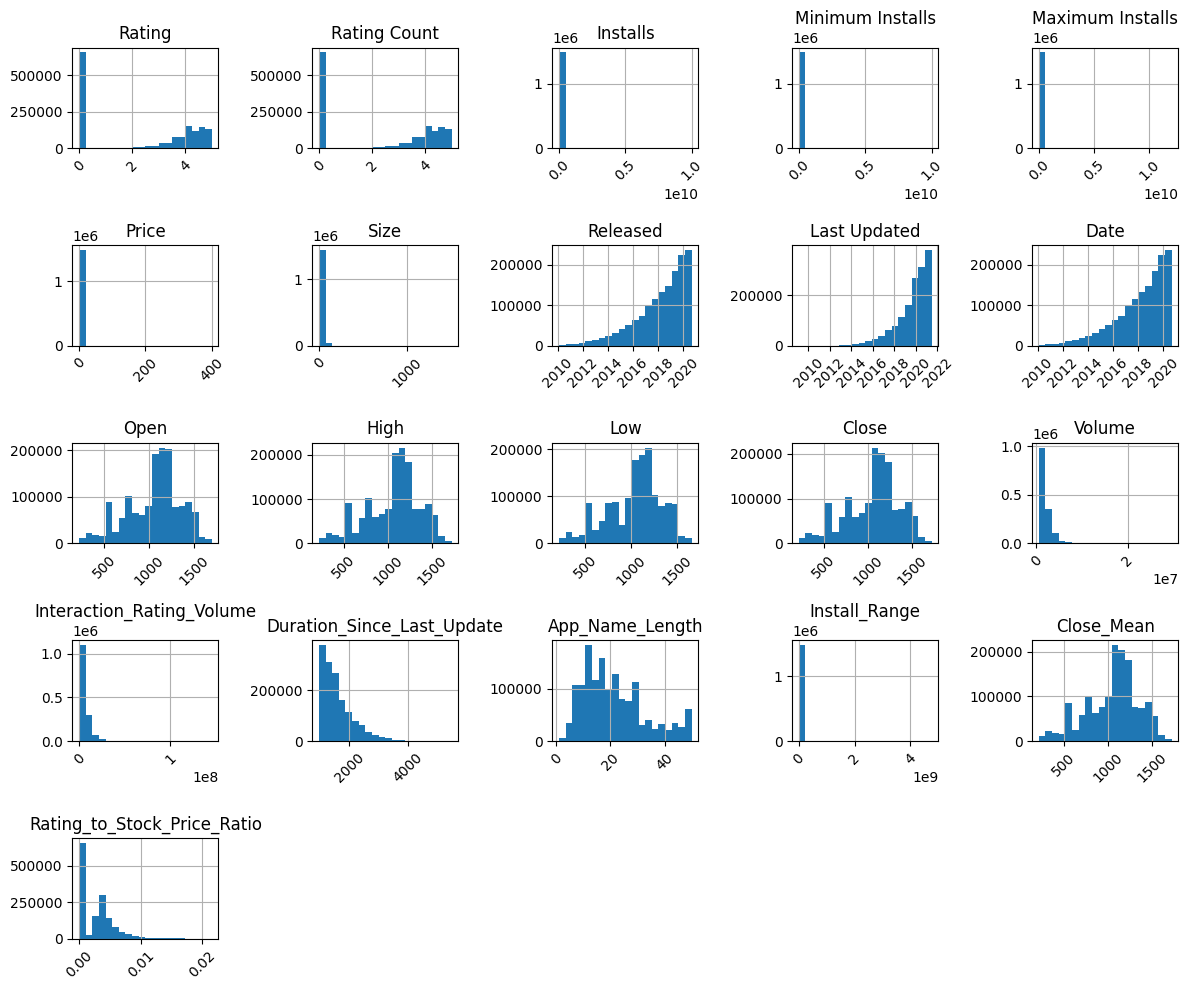

In [95]:
play_stock_data.hist(figsize=(12, 10), bins=20, xrot=45)
plt.tight_layout() 
plt.show()

#### Plot the Correlation Heatmap:

Non-numeric columns: Index(['App Name', 'Category', 'Released', 'Last Updated', 'Content Rating',
       'Ad Supported', 'In App Purchases', 'Editors Choice', 'Type', 'Date'],
      dtype='object')


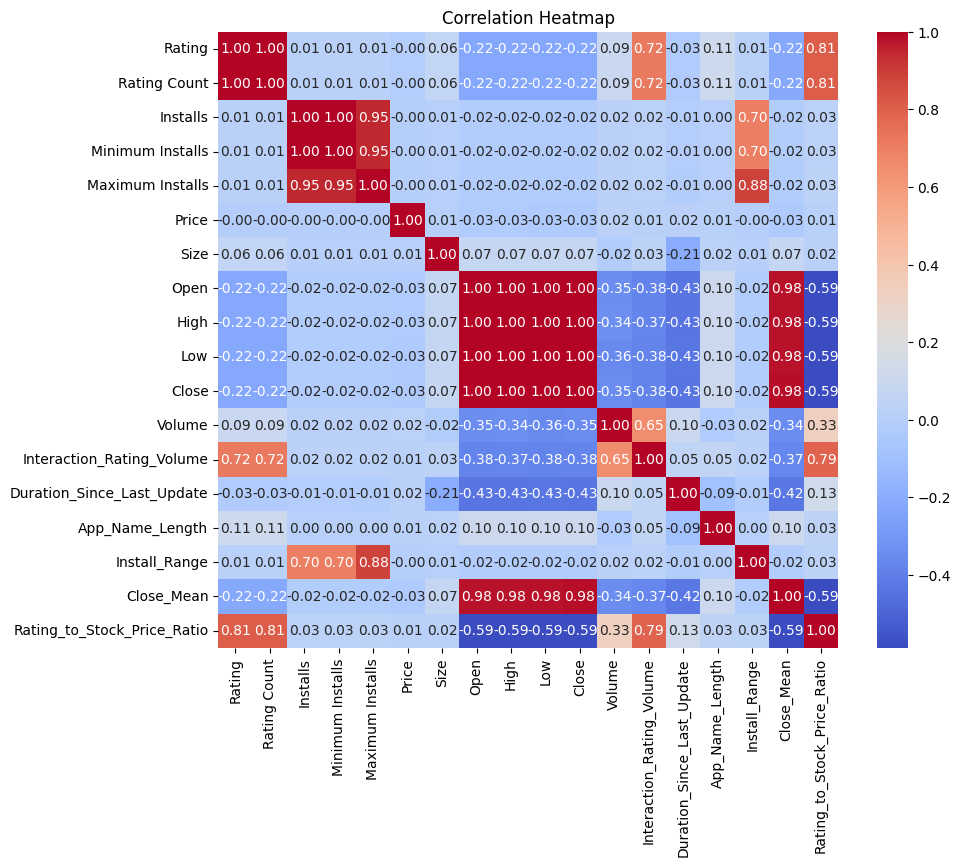

In [96]:
# Check for non-numeric columns
non_numeric_columns = play_stock_data.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)

# Exclude non-numeric columns
numeric_play_stock_data = play_stock_data.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_play_stock_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()



Here, we can see some features have positive correlations, like Rating_to_Stock_Price_Ratio, rating count and ineraction_rating_volume are correlated.

#### Plot Rating Count vs. Rating_to_stock_price_ratio

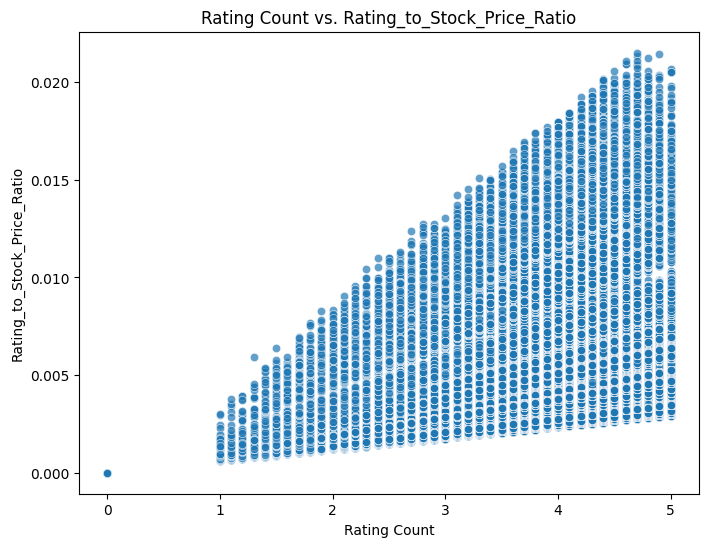

In [97]:
# plot: Rating Count vs. Rating_to_stock_price_ratio
plt.figure(figsize=(8,6))
sns.scatterplot(x='Rating Count', y='Rating_to_Stock_Price_Ratio', data=play_stock_data, alpha=0.7)
plt.title('Rating Count vs. Rating_to_Stock_Price_Ratio')
plt.xlabel('Rating Count')
plt.ylabel('Rating_to_Stock_Price_Ratio')
plt.show()

* Higher values of 'Rating Count' correspond to higher values of 'Rating_to_stock_price_ratio'.
* Each point on the scatter plot represents an app in the dataset. This figure suggests a positive correlation between the two variables.
* A higher number of ratings (more popular apps) may be associated with a higher ratio of app ratings to the average stock price, indicating potentially greater user satisfaction or perceived value relative to the stock price.

#### Plot Interaction_Rating_Volume vs. Rating_to_stock_price_ratio

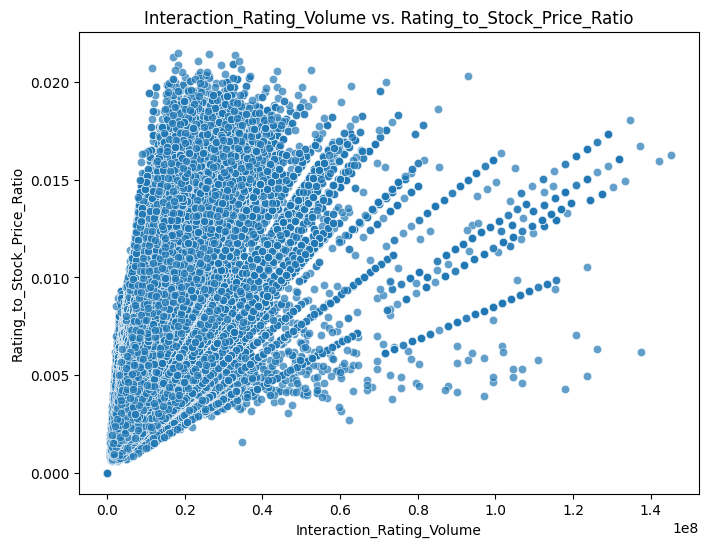

In [98]:
#plot: Interaction_Rating_Volume vs. Rating_to_stock_price_ratio
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Interaction_Rating_Volume', y='Rating_to_Stock_Price_Ratio', data=play_stock_data, alpha=0.7)
plt.title('Interaction_Rating_Volume vs. Rating_to_Stock_Price_Ratio')
plt.xlabel('Interaction_Rating_Volume')
plt.ylabel('Rating_to_Stock_Price_Ratio')
plt.show()


* Higher values of 'Interaction_Rating_Volume' correspond to higher values of 'Rating_to_Stock_Price_Ratio', suggests a positive correlation between the two variables.
* Apps with higher interaction volumes (e.g., more downloads, more active users) may have a higher ratio of app ratings to the average stock price, indicating a stronger relationship between user engagement and perceived value relative to the stock price.
  

#### Create pair plots to visualize relationships between Rating, Rating Count, Close, Rating_to_Stock_Price_Ratio

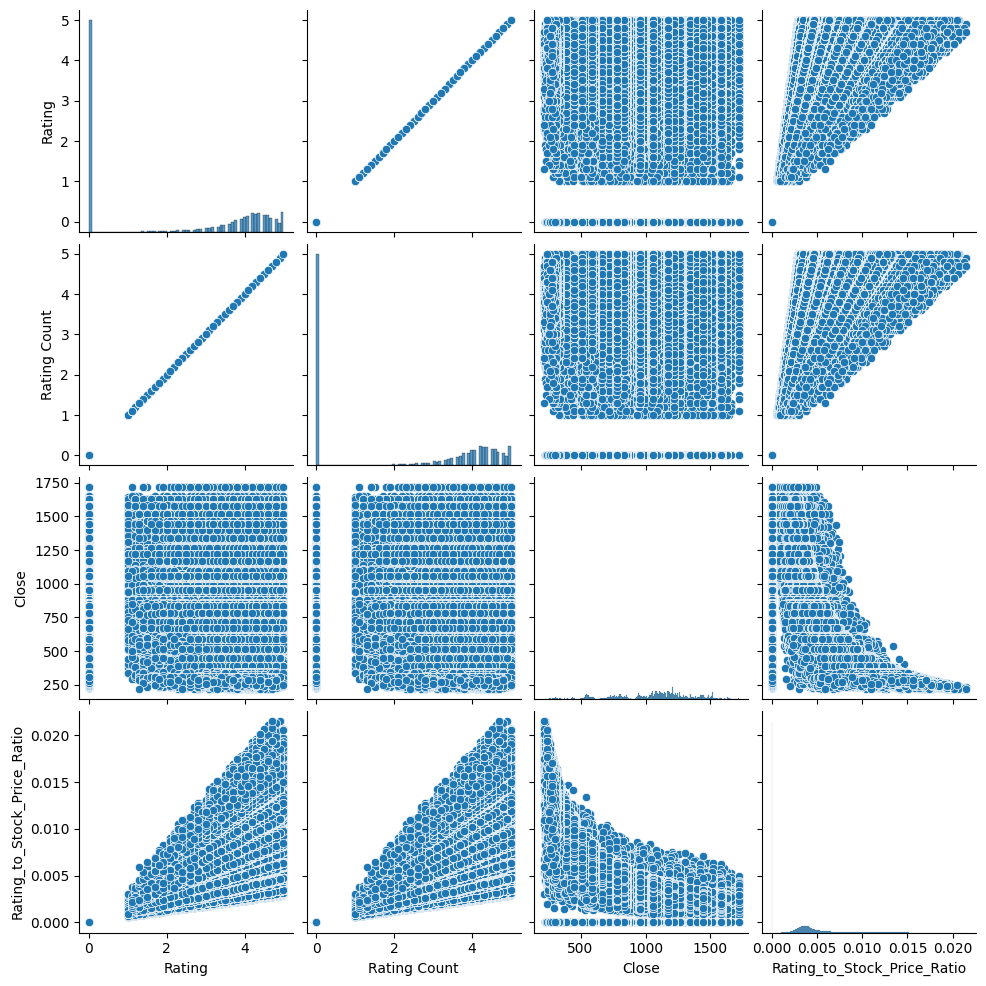

In [99]:
sns.pairplot(play_stock_data[['Rating', 'Rating Count', 'Close', 'Rating_to_Stock_Price_Ratio']])
plt.show()


* Rating vs. Rating Count: This subplot shows the relationship between the actual app ratings and the number of ratings. A positive correlation between these two variables indicates that apps with higher ratings tend to have more ratings.
* Rating vs. Rating_to_Stock_Price_Ratio: This subplot compares the actual app ratings with the calculated ratio of app ratings to the average stock price. They have a positive correlation.
* This pair plot reveals an inversely proportional relationship between 'Close' (stock price) and 'Rating_to_Stock_Price_Ratio', it suggests that as the stock price increases, the ratio of app ratings to the average stock price decreases, and vice versa. This finding could imply a potential relationship between app popularity (as indicated by ratings) and the stock price, where higher stock prices may not necessarily correlate with higher user satisfaction or perceived value relative to the stock price.
* Rating vs Stockprice(Close) : No significant pattern or relation observed. App ratings and stock prices may be influenced by different sets of factors that do not directly correlate with each other.

#### Ditsribution of content rating

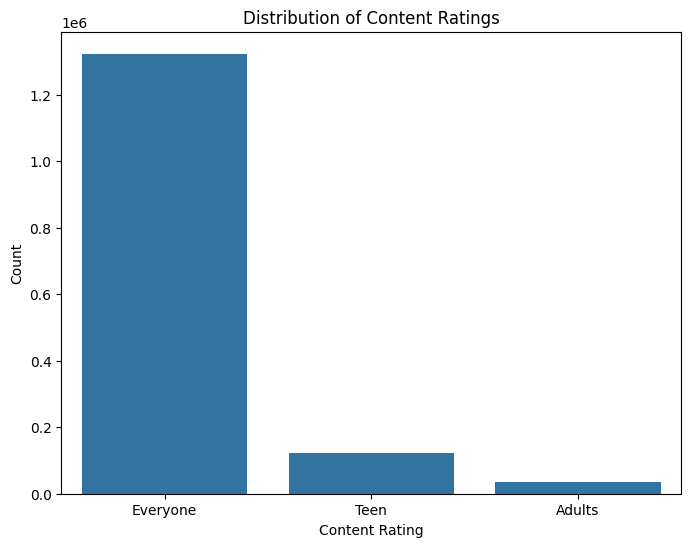

In [100]:
# plot: Content rating
plt.figure(figsize=(8, 6))
sns.countplot(x='Content Rating', data=play_stock_data)
plt.title('Distribution of Content Ratings')
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.show()

* Shows that teens contribute to content rating than that of adults.
* Apps rated for teens may often include high-quality content, such as educational resources, creative tools, or entertainment options, which receive positive feedback from users. The perceived value and enjoyment derived from these apps contribute to higher ratings.
* Teenagers may be more active and engaged users of mobile apps compared to adults, leading to increased usage, interactions, and ratings.
* Higher user engagement levels can positively influence app ratings.


##### Plotting Content Rating vs Rating

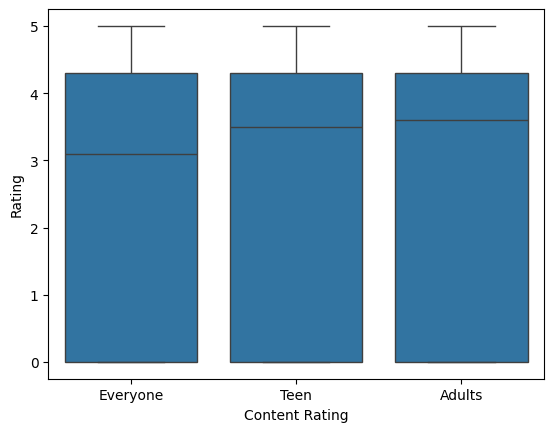

In [101]:
sns.boxplot(x='Content Rating', y='Rating', data=play_stock_data)
plt.show()


* Potential skewness in the distribution of ratings within each content rating category by examining the position of the median line relative to the middle of the box. A median line closer to the bottom or top of the box may indicate negative or positive skewness, respectively.
* Here, if the median line is closer to the top of the box (towards higher ratings) or as the lower whisker is longer than the upper whisker, it suggests a negative skew in the ratings distribution. This means that there may be relatively more high ratings and fewer low ratings within that content rating category.
* Comparatively, Adults and Teen rating are higher than that of Everyone category.

#### Time series Analysis: Checking how stock prices changes over time

The line plot visualizes the historical trend of stock prices over time. Each point on the plot represents the closing price of the stock 

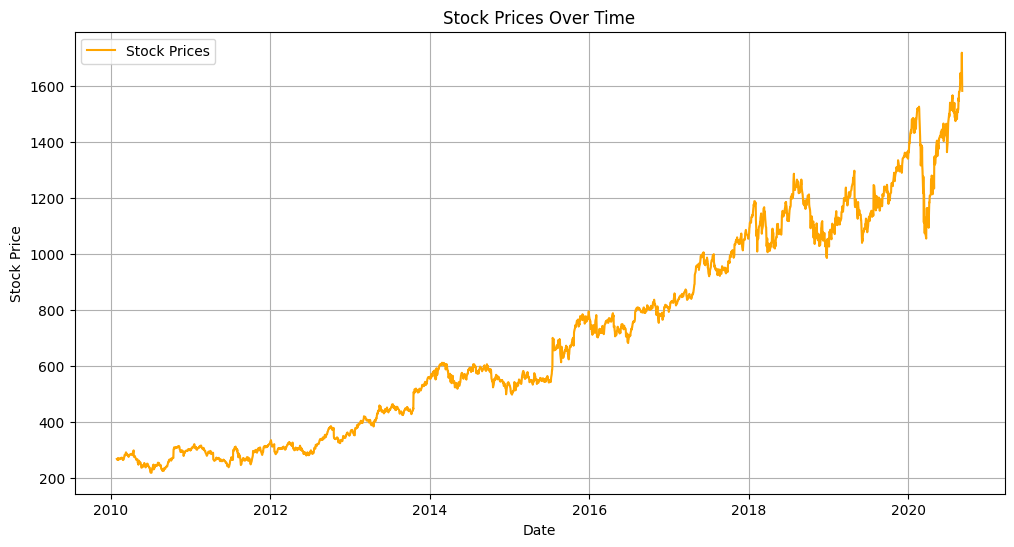

In [102]:
# Plot stock prices over time
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Close', data=play_stock_data, label='Stock Prices', color='orange')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

* In this plot, the line generally slopes upwards, indicating that the stock prices tend to increase over the observed period. This upward trend suggests positive growth or appreciation in the value of the stocks.
* The fluctuations, represented by the movement of the line around the trend, reflect the volatility of the stock market. Higher volatility indicates greater price variability and may present both opportunities and risks for investors.

Now let's analyze how is app rating changes overtime and does the stock price have any influence on app rating.

#### Time series Analysis: Checking how App Ratings changes over time

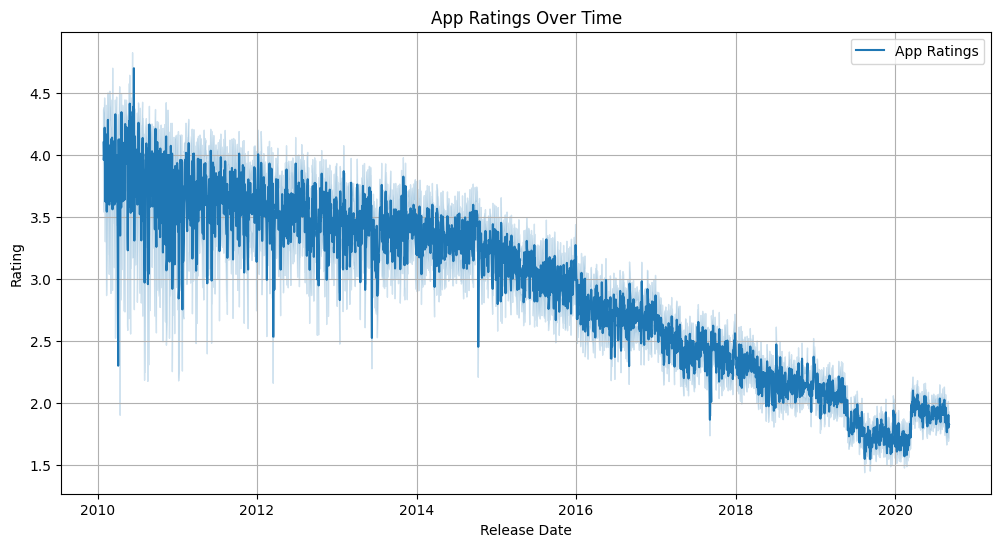

In [103]:
# Plot app ratings over time
plt.figure(figsize=(12,6))
sns.lineplot(x='Released', y='Rating', data=play_stock_data, label='App Ratings')
plt.title('App Ratings Over Time')
plt.xlabel('Release Date')
plt.ylabel('Rating')
plt.legend()
plt.grid(True)
plt.show()


* In this plot, the line generally slopes downwards, indicating that the app ratings tend to decrease over the observed period. This downward trend suggests a decline in the overall user satisfaction or perceived quality of the apps released over time.
* We can see fluctuations or variability in app ratings over time, these represented by the movement of the line around the trend, reflect changes in user feedback, app updates, or other factors influencing app ratings.
* The decreasing trend in app ratings suggests that the apps released over time have received lower ratings from users compared to earlier releases. This may be due to various factors such as declining app quality, increased competition, changes in user preferences, or shifts in market dynamics.

The decreasing trend in app ratings and the increasing trend in stock prices over time may not necessarily be directly related. App ratings and stock prices are influenced by different factors and represent different aspects of performance and value. However, there could be indirect relationships or common underlying factors that affect both.



In [104]:
#Calculate correlation coefficient of App Ratings and Stock Prices

correlation_coefficient = play_stock_data['Rating'].corr(play_stock_data['Close'])
print("Correlation Coefficient between App Ratings and Stock Prices:", correlation_coefficient)


Correlation Coefficient between App Ratings and Stock Prices: -0.224661413890613


The correlation coefficient of -0.2 indicates a relatively weak negative linear relationship between app ratings and stock prices. This means that there is a slight tendency for app ratings to decrease as stock prices increase, and vice versa, but the relationship is not very strong. Other factors and variables may be influencing both app ratings and stock prices independently.

#### Plotting ad supported, in-app purchases, app type (free/paid), price, size vs app ratings and installs

Now, we can analyze the relationships between various features such as category, size, ad supported, in-app purchases, app type (free/paid), price, and their impact on app ratings and installs.

#### Category vs Rating : category of app with the highest rating 

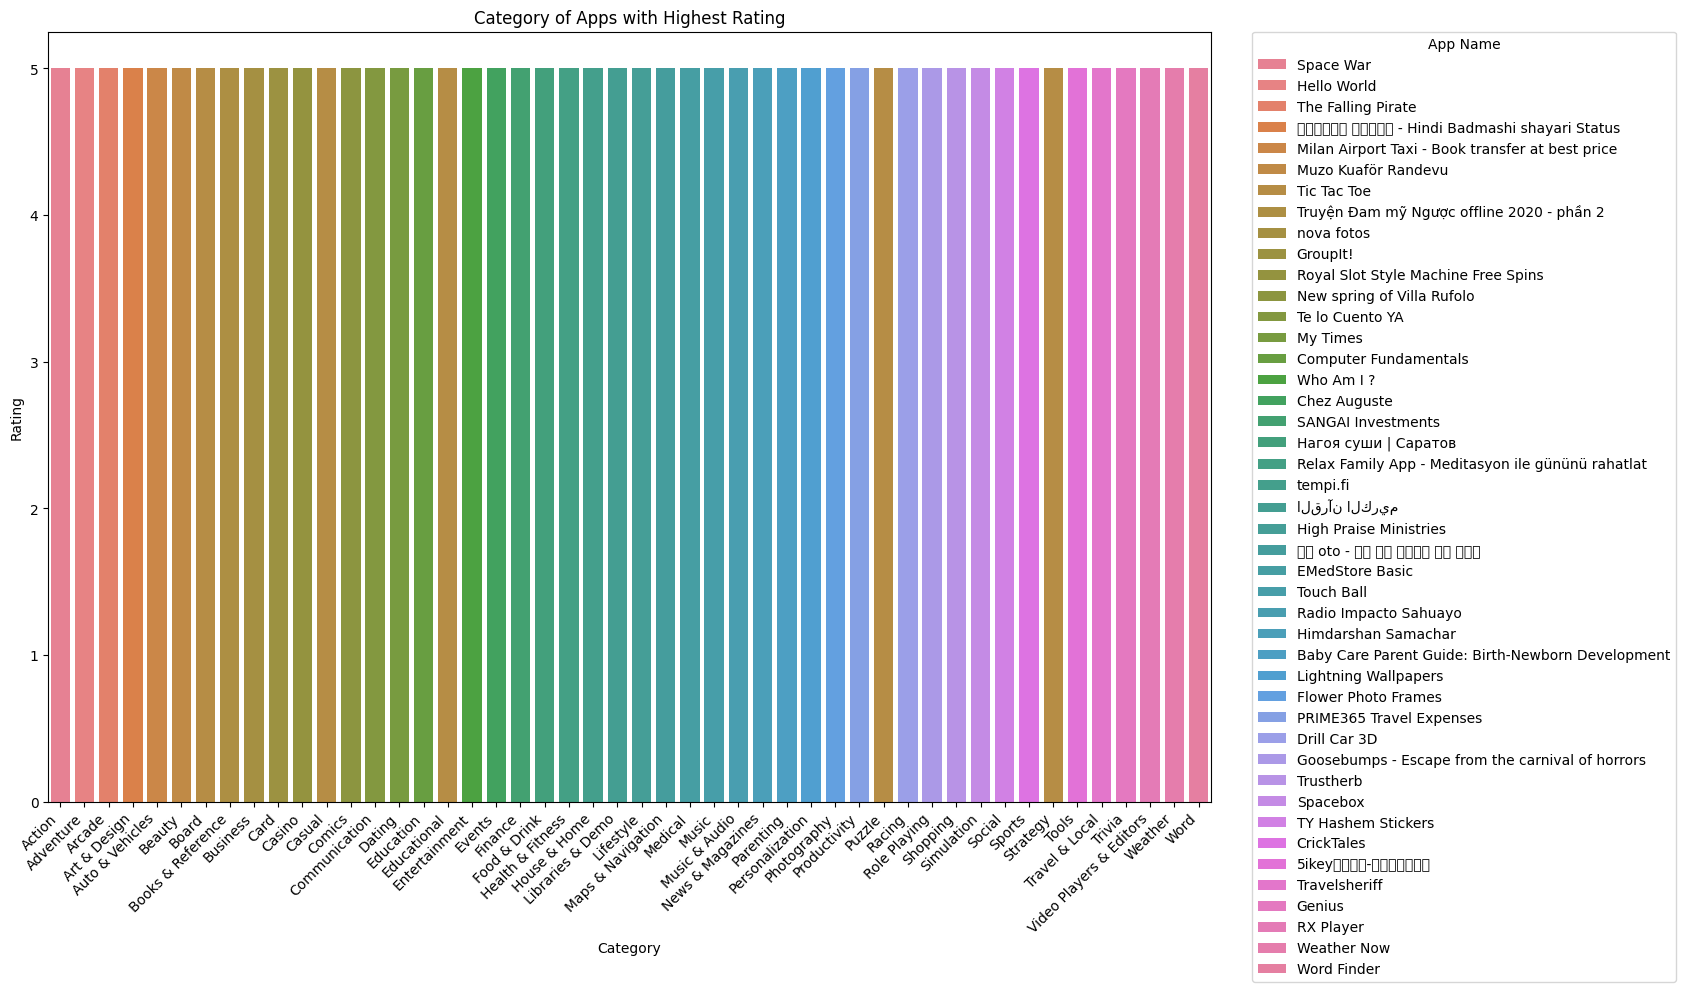

In [105]:
# Group the data by 'Category' and  category of app with the highest rating 
top_apps_by_category = play_stock_data.loc[play_stock_data.groupby('Category')['Rating'].idxmax()]

# Plot
plt.figure(figsize=(15,10))
sns.barplot(x='Category', y='Rating', hue='App Name', data=top_apps_by_category)
plt.title('Category of Apps with Highest Rating')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.legend(title='App Name', loc='upper right', bbox_to_anchor=(1.4, 1), borderaxespad=0.)
plt.show()

The plot shows the highest-rated app in each category, with the bars representing the rating of each app. Each category is represented by a different color (blue and pink). This visualization helps in understanding which app in each category has the highest rating.

#### Plotting Price, Size, and Rating

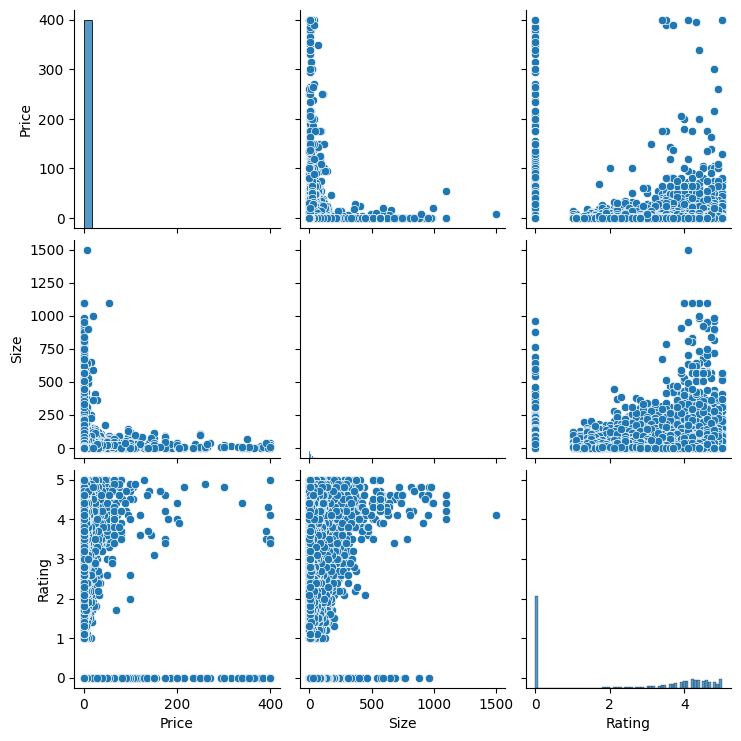

In [106]:
# plot: Price, Size, and App Rating
sns.pairplot(play_stock_data[['Price', 'Size', 'Rating']])
plt.show()

* From this plot we can say that, when size increases the price and rating decreases.
* As the size of an app increases, there may be a tendency for developers to offer it at a lower price or even for free. This could be due to various factors, such as increased competition in the market, users' reluctance to pay higher prices for larger apps, or developers' strategies to attract more downloads by pricing larger apps lower.
* Larger apps may suffer from performance issues, longer loading times, or higher resource consumption, which can negatively impact user experience and satisfaction, leading to lower ratings.
* Also, Rating is higher for lower priced apps comparatively.

#### Plot App size vs. App rating

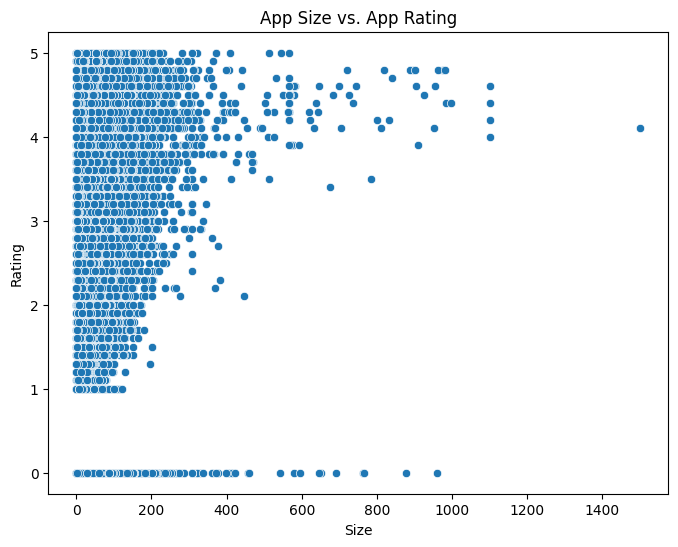

In [107]:
# Scatter plot: App size vs. App rating
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Size', y='Rating',data=play_stock_data)
plt.title('App Size vs. App Rating')
plt.xlabel('Size')
plt.ylabel('Rating')
plt.show()

* From the plot, it seems like, if the app size increases the rating is decreasing.
*  Larger app sizes might indicate that the app requires more storage space on the device. Users may perceive larger apps resource-intensive, potentially leading to lower ratings due to concerns about performance, storage usage, or overall user experience.
*  Users may be less satisfied with apps that exhibit such performance issues, resulting in lower ratings.
*  They may prioritize smaller apps that take up less space on their device, leading to a preference for smaller apps and potentially influencing ratings for larger apps negatively.

#### Plotting Price, Category vs. App rating

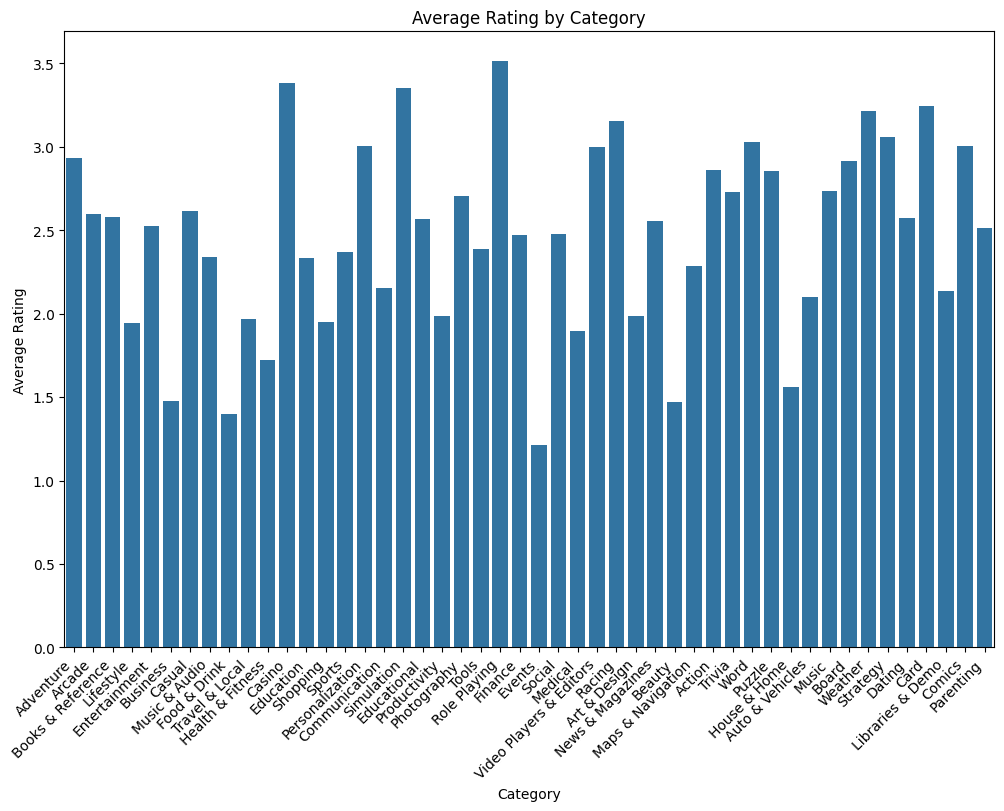

In [108]:
plt.figure(figsize=(12, 8))

# plot: Average Rating by Category
sns.barplot(x='Category', y='Rating', data=play_stock_data, ci=None)

# Set plot labels and title
plt.title('Average Rating by Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()

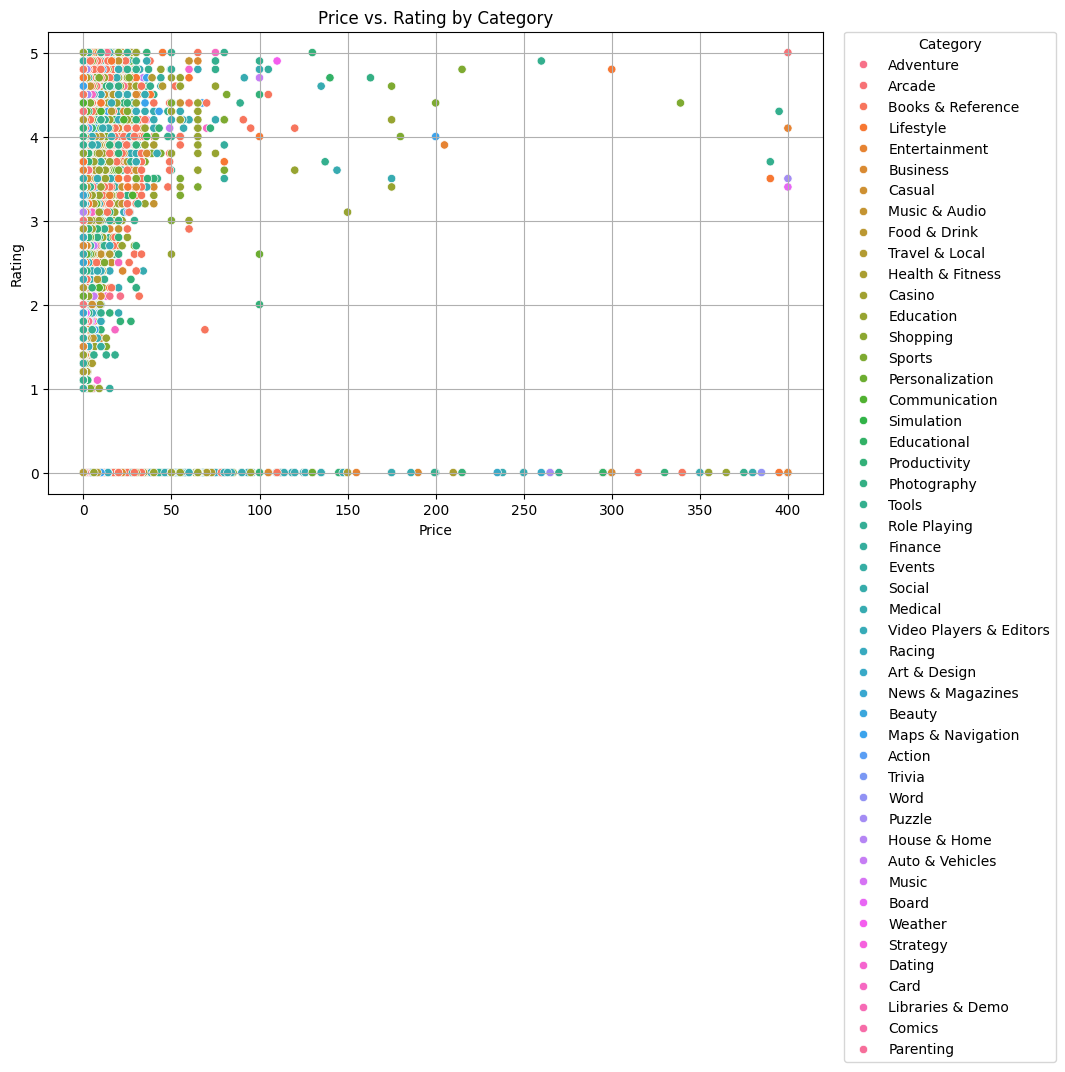

In [109]:
# Plot Price, Category, and App Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Rating', hue='Category', data=play_stock_data)
plt.title('Price vs. Rating by Category')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.legend(title='Category', loc='upper right',  bbox_to_anchor=(1.3, 1), borderaxespad=0.)
plt.grid(True)
plt.show()

* The plot shows that, apps with lower prices tend to have higher ratings compared to apps with higher prices. This observation suggests that users may perceive lower-priced apps as more valuable or affordable, leading to higher ratings. However, there are a few exceptions where higher priced apps still receive high ratings, indicating that factors other than price also influence user ratings.

#### Plot to check presence of In-App Purchases vs. App rating

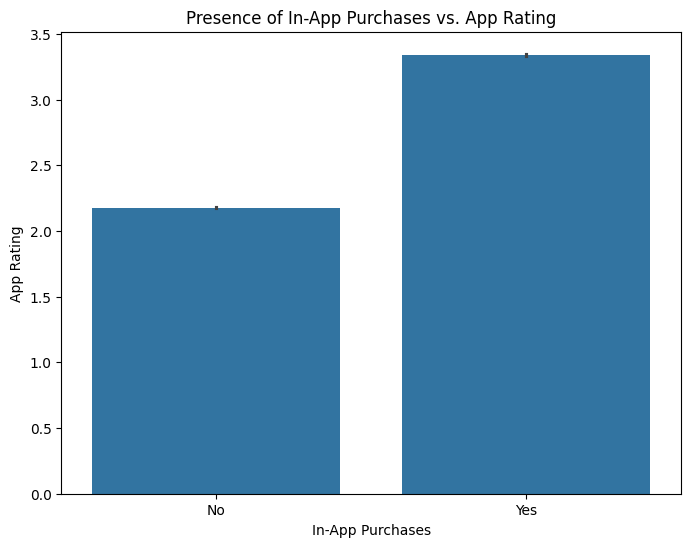

In [110]:
plt.figure(figsize=(8, 6))
sns.barplot(x='In App Purchases', y='Rating', data=play_stock_data)
plt.title('Presence of In-App Purchases vs. App Rating')
plt.xlabel('In-App Purchases')
plt.ylabel('App Rating')
plt.show()

* If the presence of in-app purchases is Yes, it seems to correlate with higher app ratings compared to apps without in-app purchases. This suggests that users may perceive apps with in-app purchases as providing more value or offering better features, leading to higher ratings.
* It suggests that incorporating in-app purchases into their apps could potentially lead to higher user satisfaction and better ratings.

#### Check Average Rating by App Type

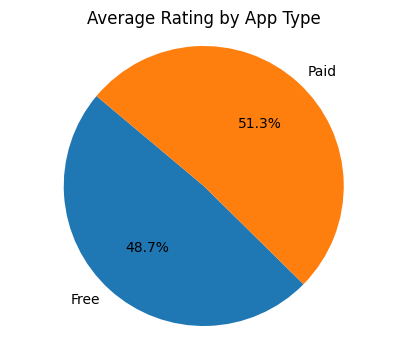

In [111]:
avg_rating_by_type = play_stock_data.groupby('Type')['Rating'].mean()

# Plotting a pie plot with percentages
plt.figure(figsize=(5, 4))
plt.pie(avg_rating_by_type, labels=avg_rating_by_type.index, autopct='%1.1f%%', startangle=140)
plt.title('Average Rating by App Type')
plt.axis('equal')  
plt.show()

* The pie plot visually represents the proportion of average ratings contributed by each app type. In this case, paid apps have a slightly higher share of average ratings compared to free apps, with approximately 51.3% of the total ratings attributed to paid apps and 48.7% to free apps.

#### Top Free apps based on their ratings and installs

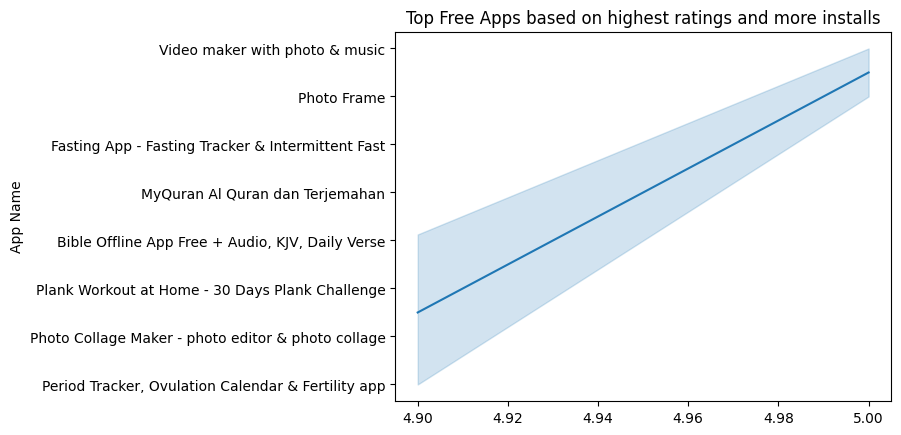

In [112]:
#Top Free apps based on their ratings and installs

free_apps = play_stock_data[(play_stock_data.Type=='Free') & (play_stock_data.Installs == 10000000)]
                                                   
free_apps = free_apps.groupby(['App Name'])['Rating'].max().sort_values(ascending=False)
free_apps = free_apps.head(10)
plt.title("Top Free Apps based on highest ratings and more installs")
sns.lineplot(x=free_apps.values,y=free_apps.index);

#### Top paid apps based on their ratings and Installs

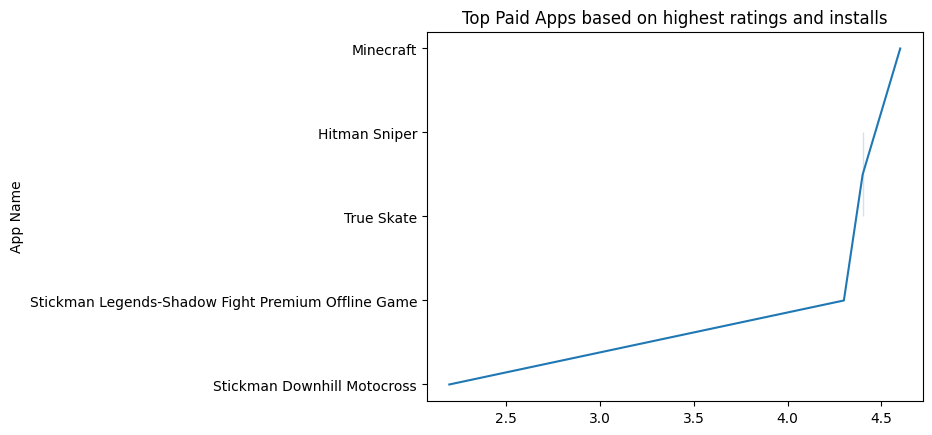

In [113]:
# Top paid apps based on their ratings and Installs

paid_apps = play_stock_data[(play_stock_data.Type=='Paid') & (play_stock_data.Installs == 5000000) | ((play_stock_data.Type=='Paid') & (play_stock_data.Installs == 10000000))]
paid_apps = paid_apps.groupby(['App Name'])['Rating'].max().sort_values(ascending=False)
paid_apps = paid_apps.head(10)
plt.title("Top Paid Apps based on highest ratings and installs")

ax = sns.lineplot(x=paid_apps.values,y=paid_apps.index);


#### Plotting Avg Rating by Ad Supported 

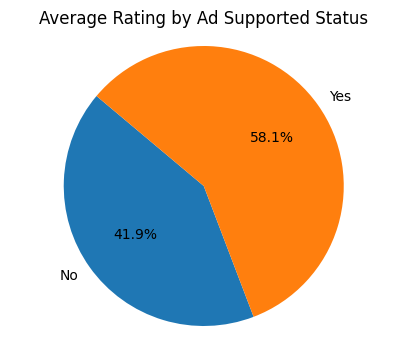

In [114]:
# Calculate average rating by Ad Supported status
avg_rating_by_ad_supported = play_stock_data.groupby('Ad Supported')['Rating'].mean()

# Create a pie plot 
plt.figure(figsize=(5,4))
plt.pie(avg_rating_by_ad_supported, labels=avg_rating_by_ad_supported.index, autopct='%1.1f%%', startangle=140)
plt.title('Average Rating by Ad Supported Status')
plt.axis('equal')  
plt.show()

* This indicates that about 58.1% of the total average ratings belong to ad-supported apps and rest for no ad supported.
* The majority of the average ratings (58.1%) belong to ad-supported apps, indicating that a significant portion of users rate ad-supported apps.
* This suggests that ad-supported apps may attract more user engagement or attention, potentially influencing the average ratings.

#### Rating by Ad Supported and App Type

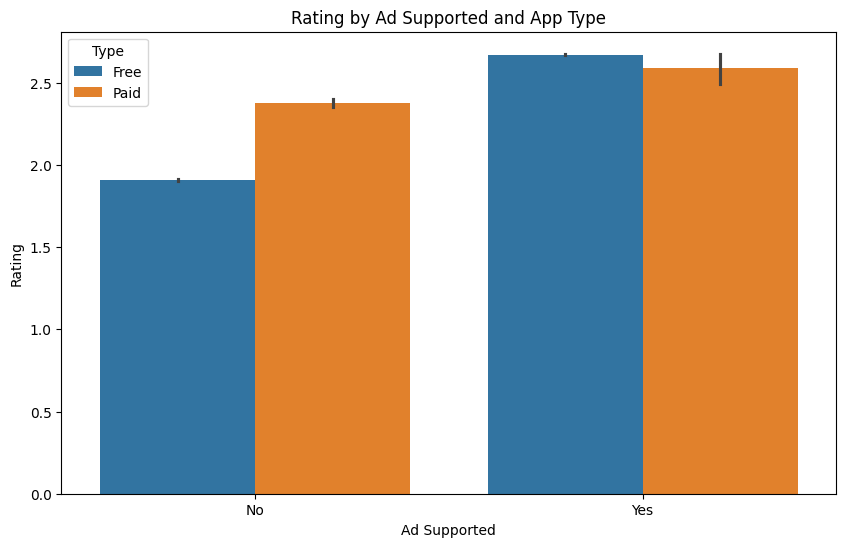

In [115]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Ad Supported', y='Rating', hue='Type', data=play_stock_data)
plt.title('Rating by Ad Supported and App Type')
plt.xlabel('Ad Supported')
plt.ylabel('Rating')
plt.legend(title='Type')
plt.show()

* Ad-supported free apps tend to have higher ratings compared to other categories. This may indicate that users are more inclined to rate apps positively if they are provided for free and supported by ads.
* On the other hand, apps that are not ad-supported and require payment (Paid) have slightly higher ratings compared to free apps without ads. This could imply that users who pay for apps have higher expectations and may be more critical in their ratings.
* Overall, the plot provides insights into how the ad-supported status and app type can influence user ratings.

# SUMMARY

<div style="text-align: justify;">The final dataset after merging Google playstore dataset and google stock market dataset contains information about various apps, including their names, categories, ratings, install counts, prices, sizes, release dates, and more. It also includes stock market data such as open, high, low, close prices, and volume. The data was checked for missing values, duplicates, and inconsistencies. Missing values were handled appropriately, and there were no duplicates. Additional features were created to enhance the analysis, such as calculating the time gap between app release and stock market data, interaction features between rating count and volume, and ratios between rating and stock price. 
Various visualizations were generated to understand the relationships and patterns in the data: Scatter plots, line plots, and histograms were used to visualize relationships between numerical variables such as app ratings, install counts, and stock prices etc. Pie charts were used to visualize the distribution of categorical variables, such as app types and ad-supported status. There is a negative correlation between app size and ratings, indicating that larger apps tend to have lower ratings. Ad-supported apps receive a higher percentage of average ratings compared to non-ad-supported apps. Certain categories, such as News & Magazines, Weather, and Casino, have higher average ratings and may be more popular among users. There is a positive correlation between app ratings and interaction features like the ratio of rating count to stock price.

<div style="text-align: justify;">Based on the analysis, it seems that app size, category, ad-supported status, and interaction features with stock market data are important factors influencing app ratings. To improve app ratings, developers could focus on optimizing app size, targeting popular categories, considering ad-supported models, and leveraging insights from stock market data. EDA provides us a valuable insights into the dataset, helping to understand the factors affecting app ratings and informing strategies for improving app performance and user satisfaction.